# Advance Regression Assignment - House Price Prediction

Rahul Kumar  ||  +91-9538109454  ||  rahul.cs068@gmail.com

# 1. Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house

# 2. Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### ## Problem Solving Methodology

* Understand problem Statement & business Goal
* Data Load
* Data Cleaning
* Data Analysis
* Feature Transformation
* Dummy variable
* Modeling
* Predictions

# 3. Import Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import scipy
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics 

# Import stats model 
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# scaling the features
from sklearn.preprocessing import scale

# split into train and test
from sklearn.model_selection import train_test_split

sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 4. Data Load

#### House Data set

In [2]:
train = pd.read_csv("C:/Users/KUR9KOR/Desktop/DataScience/Course_4/3_Advancedregression_Assignment/train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


#### Data Dictionary

In [3]:

# import io
# import requests
# url="https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt"
# s=requests.get(url).content

# train_metadata=pd.read_csv(s)
# train_metadata


# 4. Data Inspection

In [4]:
train.shape

(1460, 81)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<b>Observation: </b>3 feature are of the type float64,35 feature of the type int64 and 43 feature of the type object

In [7]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 5. Data Cleaning

#### Check for duplicates

In [9]:
len(train.drop_duplicates())

1460

#### Remove un-necessary fields/features

In [10]:
# Id filed is not required for our analysis
train.drop('Id', axis = 1, inplace = True)

#### Check The NaNs

In [11]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

##### So, these (below) are the fields which is having more or less NaN/missing values

In [12]:
train.columns[train.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Impute Missing Data and Clean Data

In [13]:
ntrain = train.shape[0]
print("Full dataset size is : {}".format(train.shape))

Full dataset size is : (1460, 80)


In [14]:
# Find Missing Ratio of Dataset
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

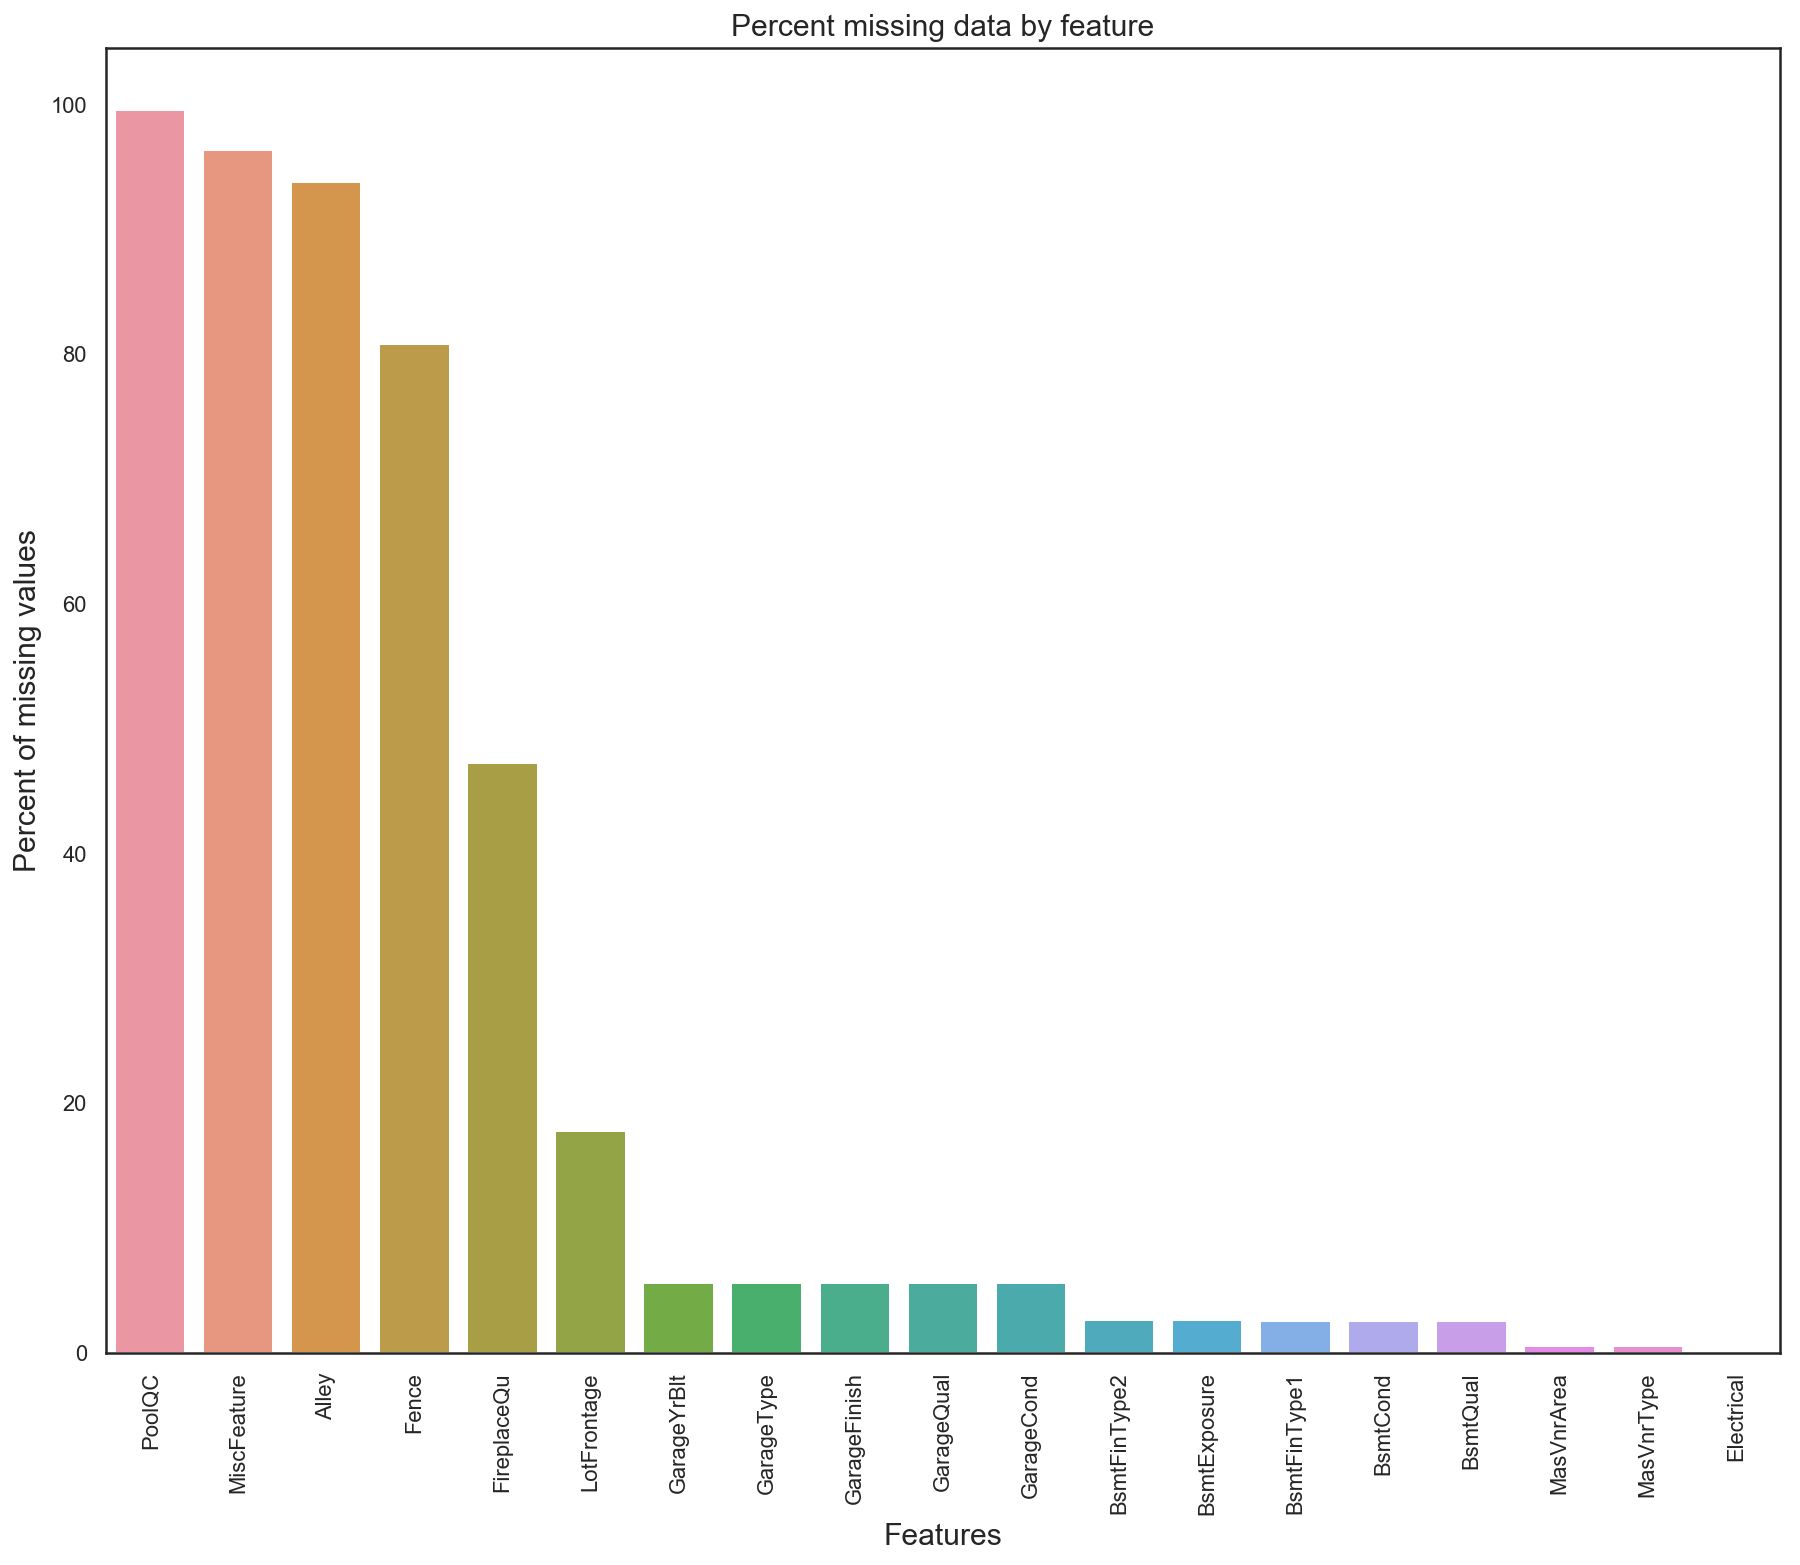

In [15]:
# Percent missing data by feature
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Imputing Missing Values

from Data description / metadata, we could see 

* PoolQC : NA means "No Pool"
* MiscFeature : NA means "no misc feature"
* Alley : NA means "no alley access"
* Fence : NA means "no fence"
* FireplaceQu : NA means "no fireplace"
* LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , so fill in missing values by the median LotFrontage of the neighborhood
* GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with "None"
* GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0
* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: Replacing missing data with 0.
* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there isn't a basement.
* MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
* MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'.
* Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
* Functional : data description says NA means typical.
* Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
* KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
* Exterior1st and Exterior2nd : Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
* SaleType : Fill in again with most frequent which is "WD"
* MSSubClass : Na most likely means No building class. We can replace missing values with None



In [16]:
train["PoolQC"] = train["PoolQC"].fillna("None")
train["MiscFeature"] = train["MiscFeature"].fillna("None")
train["Alley"] = train["Alley"].fillna("None")
train["Fence"] = train["Fence"].fillna("None")
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

train['GarageType'] = train['GarageType'].fillna('No Garage')
train['GarageFinish'] = train['GarageFinish'].fillna('No Garage')
train['GarageQual'] = train['GarageQual'].fillna('No Garage')
train['GarageCond'] = train['GarageCond'].fillna('No Garage')

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
train['GarageArea'] = train['GarageArea'].fillna(0)
train['GarageCars'] = train['GarageCars'].fillna(0)

In [17]:
train['BsmtFinSF1'] = train['BsmtFinSF1'].fillna(0)
train['BsmtFinSF2'] = train['BsmtFinSF2'].fillna(0)
train['BsmtUnfSF'] = train['BsmtUnfSF'].fillna(0)
train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(0)
train['BsmtFullBath'] = train['BsmtFullBath'].fillna(0)
train['BsmtHalfBath'] = train['BsmtHalfBath'].fillna(0)

train['BsmtQual'] = train['BsmtQual'].fillna('No Basement')
train['BsmtCond'] = train['BsmtCond'].fillna('No Basement')
train['BsmtExposure'] = train['BsmtExposure'].fillna('No Basement')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('No Basement')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('No Basement')

train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

In [18]:
train["Functional"] = train["Functional"].fillna("Typ")
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train['MSSubClass'] = train['MSSubClass'].fillna("None")

#### Check if there are any missing values left

In [19]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head()

,Missing Ratio


<b>Observation: </b> Good! we do NOT have any more missing values.

# 6. Data Understanding & Preparation for Analysis

Note: When we go ahead with Data preparation, there would be some cleaning as well performed. Because everything we could not identified just having initial look. So lets go little deeper and perform EDA

#### Categorical Variable Analysis

In [20]:
# MSZoning: Identifies the general zoning classification of the sale.
print(train['MSZoning'].astype('category').value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


In [21]:
# Street: Type of road access to property
print(train['Street'].astype('category').value_counts(dropna=False))

Pave    1454
Grvl       6
Name: Street, dtype: int64


In [22]:
# Most of the properties has Pavement and this column can be dropped
train.drop('Street', axis = 1, inplace = True)

In [23]:
#Alley: Type of alley access to property
print(train['Alley'].astype('category').value_counts(dropna=False))

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


In [24]:
# Most of the properties don't have access to Alley and this column can be dropped
train.drop('Alley', axis = 1, inplace = True)

In [25]:
# LotShape: General shape of property
print(train['LotShape'].astype('category').value_counts(dropna=False))

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


In [26]:
# LandContour: Flatness of the property
print(train['LandContour'].astype('category').value_counts(dropna=False))

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


In [27]:
# Utilities: Type of utilities available
print(train['Utilities'].astype('category').value_counts(dropna=False))


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [28]:
# There exists only 2 categories and one has only one value and this column can be dropped
train.drop('Utilities', axis = 1, inplace = True)

In [29]:
# LotConfig: Lot configuration
print(train['LotConfig'].astype('category').value_counts(dropna=False))

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


In [30]:
# LandSlope: Slope of property
print(train['LandSlope'].astype('category').value_counts(dropna=False))

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


In [31]:
# Neighborhood: Physical locations within Ames city limits
print(train['Neighborhood'].astype('category').value_counts(dropna=False))

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


In [32]:
# Condition1: Proximity to various conditions
print(train['Condition1'].astype('category').value_counts(dropna=False))

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


In [33]:
# Condition2: Proximity to various conditions (if more than one is present)
print(train['Condition2'].astype('category').value_counts(dropna=False))

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64


In [34]:
# Most of the properties are normal and this column can be dropped
train.drop('Condition2', axis = 1, inplace = True)

In [35]:
# BldgType: Type of dwelling
print(train['BldgType'].astype('category').value_counts(dropna=False))

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


In [36]:
# HouseStyle: Style of dwelling
print(train['HouseStyle'].astype('category').value_counts(dropna=False))

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


In [37]:
# OverallQual: Rates the overall material and finish of the house
print(train['OverallQual'].astype('category').value_counts(dropna=False))

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


In [38]:
# OverallCond: Rates the overall condition of the house
print(train['OverallCond'].astype('category').value_counts(dropna=False))

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


In [39]:
# RoofStyle: Type of roof
print(train['RoofStyle'].astype('category').value_counts(dropna=False))

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


In [40]:
# RoofMatl: Roof material
print(train['RoofMatl'].astype('category').value_counts(dropna=False))

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64


In [41]:
# Most of the realestage use Standard (Composite) Shingle material and this column can be dropped
train.drop('RoofMatl', axis = 1, inplace = True)

In [42]:
# Exterior1st: Exterior covering on house
print(train['Exterior1st'].astype('category').value_counts(dropna=False))

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64


In [43]:
# Exterior2nd: Exterior covering on house (if more than one material)
print(train['Exterior2nd'].astype('category').value_counts(dropna=False))

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


In [44]:
# MasVnrType: Masonry veneer type
print(train['MasVnrType'].astype('category').value_counts(dropna=False))

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [45]:
# ExterQual: Evaluates the quality of the material on the exterior 
print(train['ExterQual'].astype('category').value_counts(dropna=False))

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


In [46]:
# ExterCond: Evaluates the present condition of the material on the exterior
print(train['ExterCond'].astype('category').value_counts(dropna=False))

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


In [47]:
# Foundation: Type of foundation
print(train['Foundation'].astype('category').value_counts(dropna=False))

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


In [48]:
# BsmtQual: Evaluates the height of the basement
print(train['BsmtQual'].astype('category').value_counts(dropna=False))

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64


In [49]:
# BsmtCond: Evaluates the general condition of the basement
print(train['BsmtCond'].astype('category').value_counts(dropna=False))

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64


In [50]:
# BsmtExposure: Refers to walkout or garden level walls
print(train['BsmtExposure'].astype('category').value_counts(dropna=False))

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64


In [51]:
# BsmtFinType1: Rating of basement finished area
print(train['BsmtFinType1'].astype('category').value_counts(dropna=False))

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64


In [52]:
# BsmtFinType2: Rating of basement finished area (if multiple types)
print(train['BsmtFinType2'].astype('category').value_counts(dropna=False))

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64


In [53]:
# Heating: Type of heating
print(train['Heating'].astype('category').value_counts(dropna=False))

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


In [54]:
# HeatingQC: Heating quality and condition
print(train['HeatingQC'].astype('category').value_counts(dropna=False))

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


In [55]:
# CentralAir: Central air conditioning
print(train['CentralAir'].astype('category').value_counts(dropna=False))

Y    1365
N      95
Name: CentralAir, dtype: int64


In [56]:
# Electrical: Electrical system
print(train['Electrical'].astype('category').value_counts(dropna=False))

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [57]:
# KitchenQual: Kitchen quality
print(train['KitchenQual'].astype('category').value_counts(dropna=False))

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


In [58]:
# Functional: Home functionality (Assume typical unless deductions are warranted)
print(train['Functional'].astype('category').value_counts(dropna=False))

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


In [59]:
# FireplaceQu: Fireplace quality
print(train['FireplaceQu'].astype('category').value_counts(dropna=False))

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64


In [60]:
# GarageType: Garage location
print(train['GarageType'].astype('category').value_counts(dropna=False))

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64


In [61]:
# GarageFinish: Interior finish of the garage
print(train['GarageFinish'].astype('category').value_counts(dropna=False))

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64


In [62]:
# GarageQual: Garage quality
print(train['GarageQual'].astype('category').value_counts(dropna=False))

TA           1311
No Garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64


In [63]:
# GarageCond: Garage condition
print(train['GarageCond'].astype('category').value_counts(dropna=False))

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64


In [64]:
# PavedDrive: Paved driveway
print(train['PavedDrive'].astype('category').value_counts(dropna=False))

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


In [65]:
# PoolQC: Pool quality
print(train['PoolQC'].astype('category').value_counts(dropna=False))

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64


In [66]:
# Pool is not present in most of the houses and this can be dropped
train.drop('PoolQC', axis = 1, inplace = True)

In [67]:
# Fence: Fence quality
print(train['Fence'].astype('category').value_counts(dropna=False))

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


In [68]:
# Most of the property don't have Fence and this can be dropped
train.drop('Fence', axis = 1, inplace = True)

In [69]:
# MiscFeature: Miscellaneous feature not covered in other categories
print(train['MiscFeature'].astype('category').value_counts(dropna=False))

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64


In [70]:
# Most of the property don't have additional feature and this can be dropped
train.drop('MiscFeature', axis = 1, inplace = True)

In [71]:
# SaleType: Type of sale
print(train['SaleType'].astype('category').value_counts(dropna=False))

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


In [72]:
# SaleCondition: Condition of sale
print(train['SaleCondition'].astype('category').value_counts(dropna=False))

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


In [73]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [74]:
# Below columns are converted to object string type as they are categorical in nature
# MSSubClass, GarageYrBlt,OverallCond, OverallQual, YrSold, YrSold, YearBuilt, YearBuilt
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['GarageYrBlt'] = train['GarageYrBlt'].astype(str)
train['OverallCond'] = train['OverallCond'].astype(str)
train['OverallQual'] = train['OverallCond'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['YearBuilt'] = train['YearBuilt'].astype(str)
train['YearRemodAdd'] = train['YearRemodAdd'].astype(str)

In [75]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
print(train['MSSubClass'].astype('category').value_counts(dropna=False))

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


In [76]:
# OverallQual: Rates the overall material and finish of the house
print(train['OverallQual'].astype('category').value_counts(dropna=False))

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallQual, dtype: int64


In [77]:
# OverallCond: Rates the overall condition of the house
print(train['OverallCond'].astype('category').value_counts(dropna=False))

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


In [78]:
# YrSold: Year Sold (YYYY)
print(train['YrSold'].astype('category').value_counts(dropna=False))

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


In [79]:
# MoSold: Month Sold (MM)
print(train['MoSold'].astype('category').value_counts(dropna=False))

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


#### Observation
Below columsn are converted to object string type as they are categorical in nature
- MSSubClass
- GarageYrBlt
- OverallCond
- OverallQual
- YrSold 
- MoSold
- YearBuilt
- YearRemodAdd

Data observation can be done on the below columns again
- MSSubClass
- OverallCond
- OverallQual
Below columns can be dropped
- Street
- Utilities
- Condition2
- RoofMatl
- PoolQC
- Fence
- MiscFeature


#### New Feature

We can add a new feature, Total Area which is Total build up area. This can be done by summing up below columns and later they can be dropped
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF

In [80]:
# total Square Foot
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

In [81]:
# drop the three fields now, not required any more
train.drop('TotalBsmtSF',axis=1,inplace=True)
train.drop('1stFlrSF',axis=1,inplace=True)
train.drop('2ndFlrSF',axis=1,inplace=True)

#### Numerical Variables

In [82]:
train_numeric = train.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
train_numeric

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
0,65.0,8450,196.0,706,0,150,0,1710,1,0,...,548,0,61,0,0,0,0,0,208500,2566
1,80.0,9600,0.0,978,0,284,0,1262,0,1,...,460,298,0,0,0,0,0,0,181500,2524
2,68.0,11250,162.0,486,0,434,0,1786,1,0,...,608,0,42,0,0,0,0,0,223500,2706
3,60.0,9550,0.0,216,0,540,0,1717,1,0,...,642,0,35,272,0,0,0,0,140000,2473
4,84.0,14260,350.0,655,0,490,0,2198,1,0,...,836,192,84,0,0,0,0,0,250000,3343
5,85.0,14115,0.0,732,0,64,0,1362,1,0,...,480,40,30,0,320,0,0,700,143000,2158
6,75.0,10084,186.0,1369,0,317,0,1694,1,0,...,636,255,57,0,0,0,0,0,307000,3380
7,80.0,10382,240.0,859,32,216,0,2090,1,0,...,484,235,204,228,0,0,0,350,200000,3197
8,51.0,6120,0.0,0,0,952,0,1774,0,0,...,468,90,0,205,0,0,0,0,129900,2726
9,50.0,7420,0.0,851,0,140,0,1077,1,0,...,205,0,4,0,0,0,0,0,118000,2068


In [83]:
train_categorical = train.select_dtypes(include=['object'])
train_categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,Attchd,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,...,Attchd,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,Attchd,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,...,Detchd,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,Attchd,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal


Will Check the importatnt feature in dataset: <b>Sale Price</b>

In [84]:
# Getting Description
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

minimum price is larger than zero. Overall things look good !


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

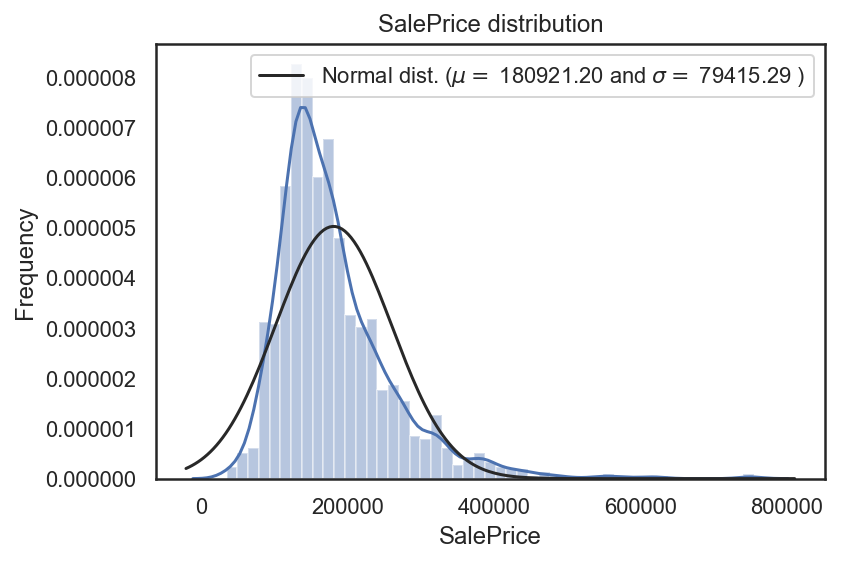

In [85]:
# Plot Histogram
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')



In [86]:
train_numeric["SalePrice"] = np.log1p(train_numeric["SalePrice"])

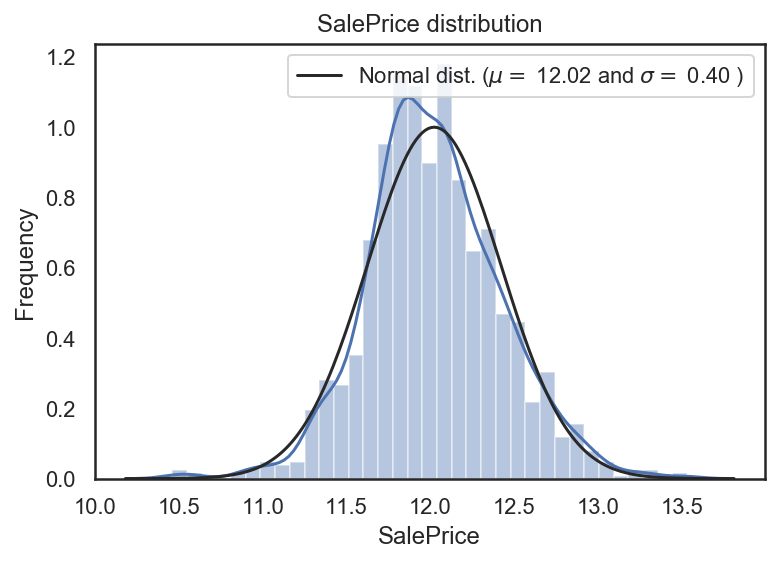

In [87]:
def fn_SalesPrice():
    sns.distplot(train_numeric['SalePrice'] , fit=norm);
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train_numeric['SalePrice'])
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')
    plt.show()
fn_SalesPrice()

###### lets get the skewness of Sales Price

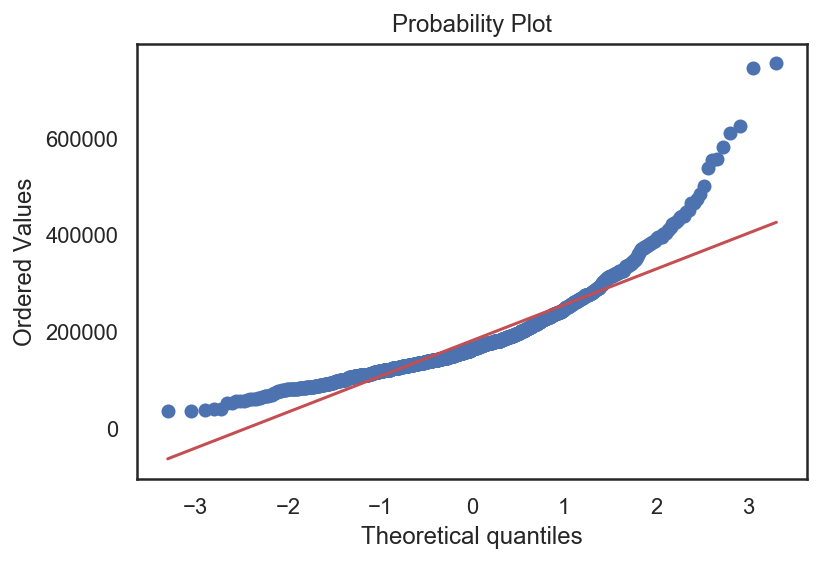

Skewness: 1.882876
Kurtosis: 6.536282


In [88]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

If we see kurtosis score, there is a nice peak. But, looking at the skewness score, we can see that the sale prices deviate from the normal distribution. We may need to fix this to keep the data model as "normal" as possible

#### lets try to figure out see some relations between the features

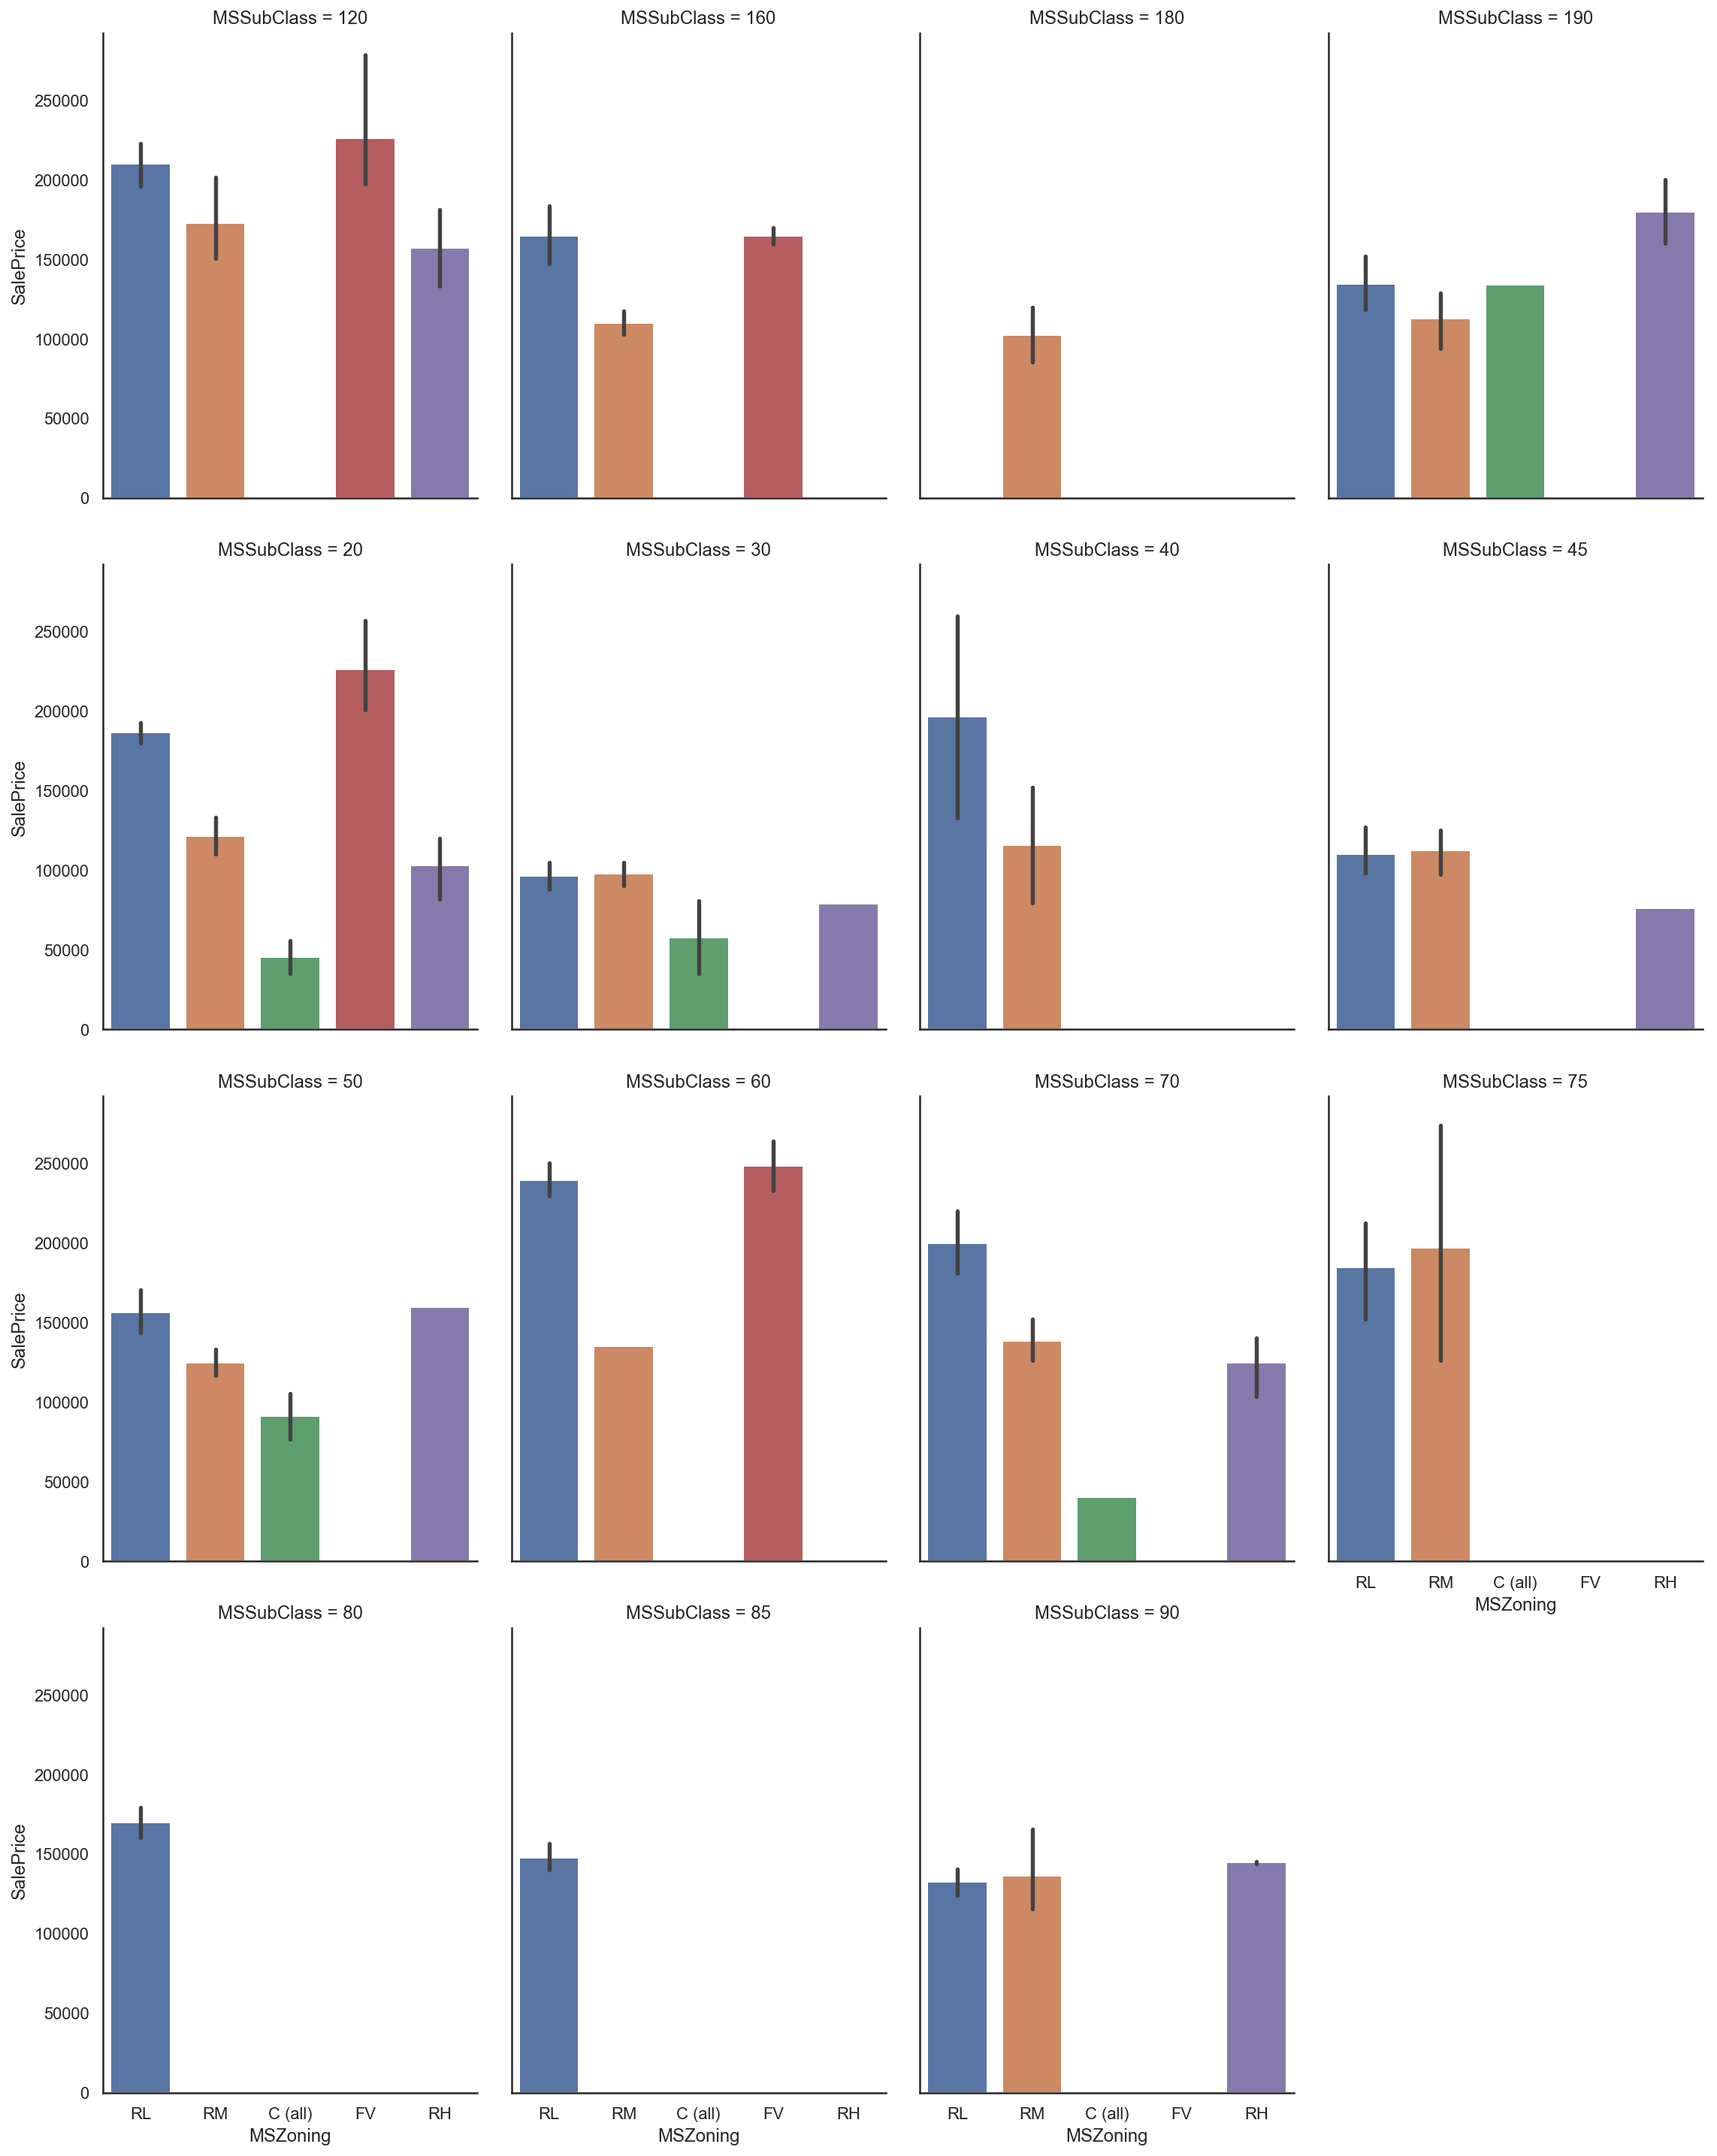

In [89]:
sns.catplot(x='MSZoning', y='SalePrice', col='MSSubClass', data=train, kind='bar', col_wrap=4, aspect=0.8)
plt.show()

With these many features, saying which feature is most related to house prices will be little complicated. 
Lets check with correlation matrix

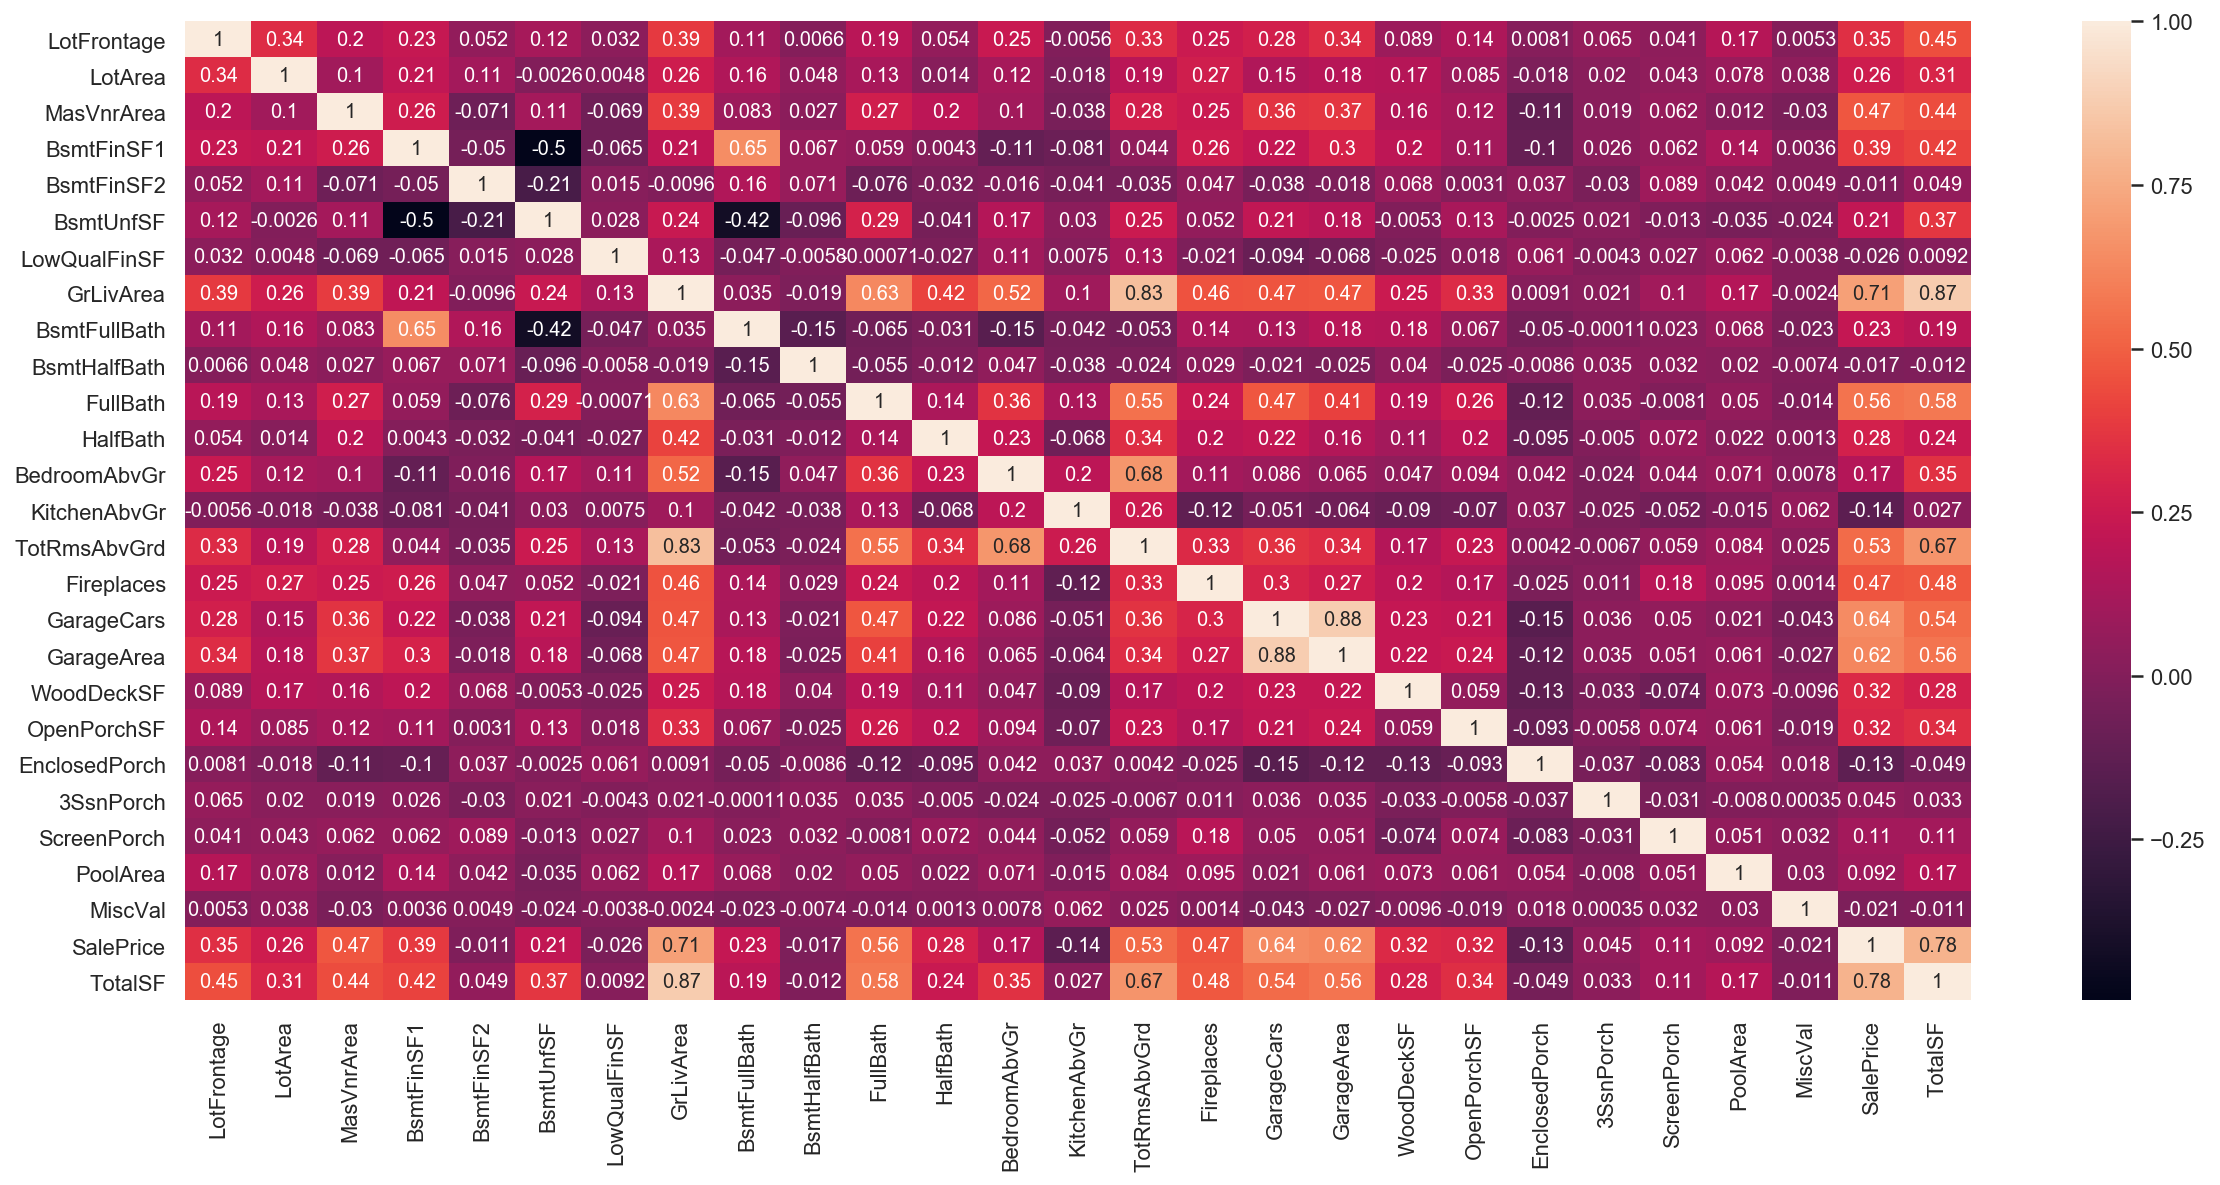

In [90]:
# Correlation Matrix Heatmap
corrmat = train.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [91]:
cor = train_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
LotFrontage,1.000000,0.335957,0.195830,0.232576,0.052237,0.119174,0.031873,0.385190,0.107226,0.006620,...,0.339085,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.353288,0.447873
LotArea,0.335957,1.000000,0.103321,0.214103,0.111170,-0.002618,0.004779,0.263116,0.158155,0.048046,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.257320,0.307234
MasVnrArea,0.195830,0.103321,1.000000,0.261256,-0.071330,0.113862,-0.068628,0.388052,0.083010,0.027403,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.426776,0.444454
BsmtFinSF1,0.232576,0.214103,0.261256,1.000000,-0.050117,-0.495251,-0.064503,0.208171,0.649212,0.067418,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.372023,0.415843
BsmtFinSF2,0.052237,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.014807,-0.009640,0.158678,0.070948,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.004832,0.048916
BsmtUnfSF,0.119174,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.028167,0.240257,-0.422900,-0.095804,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.221985,0.373733
LowQualFinSF,0.031873,0.004779,-0.068628,-0.064503,0.014807,0.028167,1.000000,0.134683,-0.047143,-0.005842,...,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.037963,0.009207
GrLivArea,0.385190,0.263116,0.388052,0.208171,-0.009640,0.240257,0.134683,1.000000,0.034836,-0.018918,...,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.700927,0.874373
BsmtFullBath,0.107226,0.158155,0.083010,0.649212,0.158678,-0.422900,-0.047143,0.034836,1.000000,-0.147871,...,0.179189,0.175315,0.067341,-0.049911,-0.000106,0.023148,0.067616,-0.023047,0.236224,0.189158
BsmtHalfBath,0.006620,0.048046,0.027403,0.067418,0.070948,-0.095804,-0.005842,-0.018918,-0.147871,1.000000,...,-0.024536,0.040161,-0.025324,-0.008555,0.035114,0.032121,0.020025,-0.007367,-0.005149,-0.011921


We can notice that some variables are strongly correlated with SalePrice. Specifically, these six features : OverallQual, GrlivArea, TotalBsmtSF, 1stFLrSF, GarageCars, and GrageArea. Moreover, some variables are strongly correlated with each other which means that we might have a multicollinearity. Subsequently, we need to take them into consideration when selecting and preparing the features to use in our modelling.

Data looks very clumzy. Will just take top 10 features most related to Sale Price

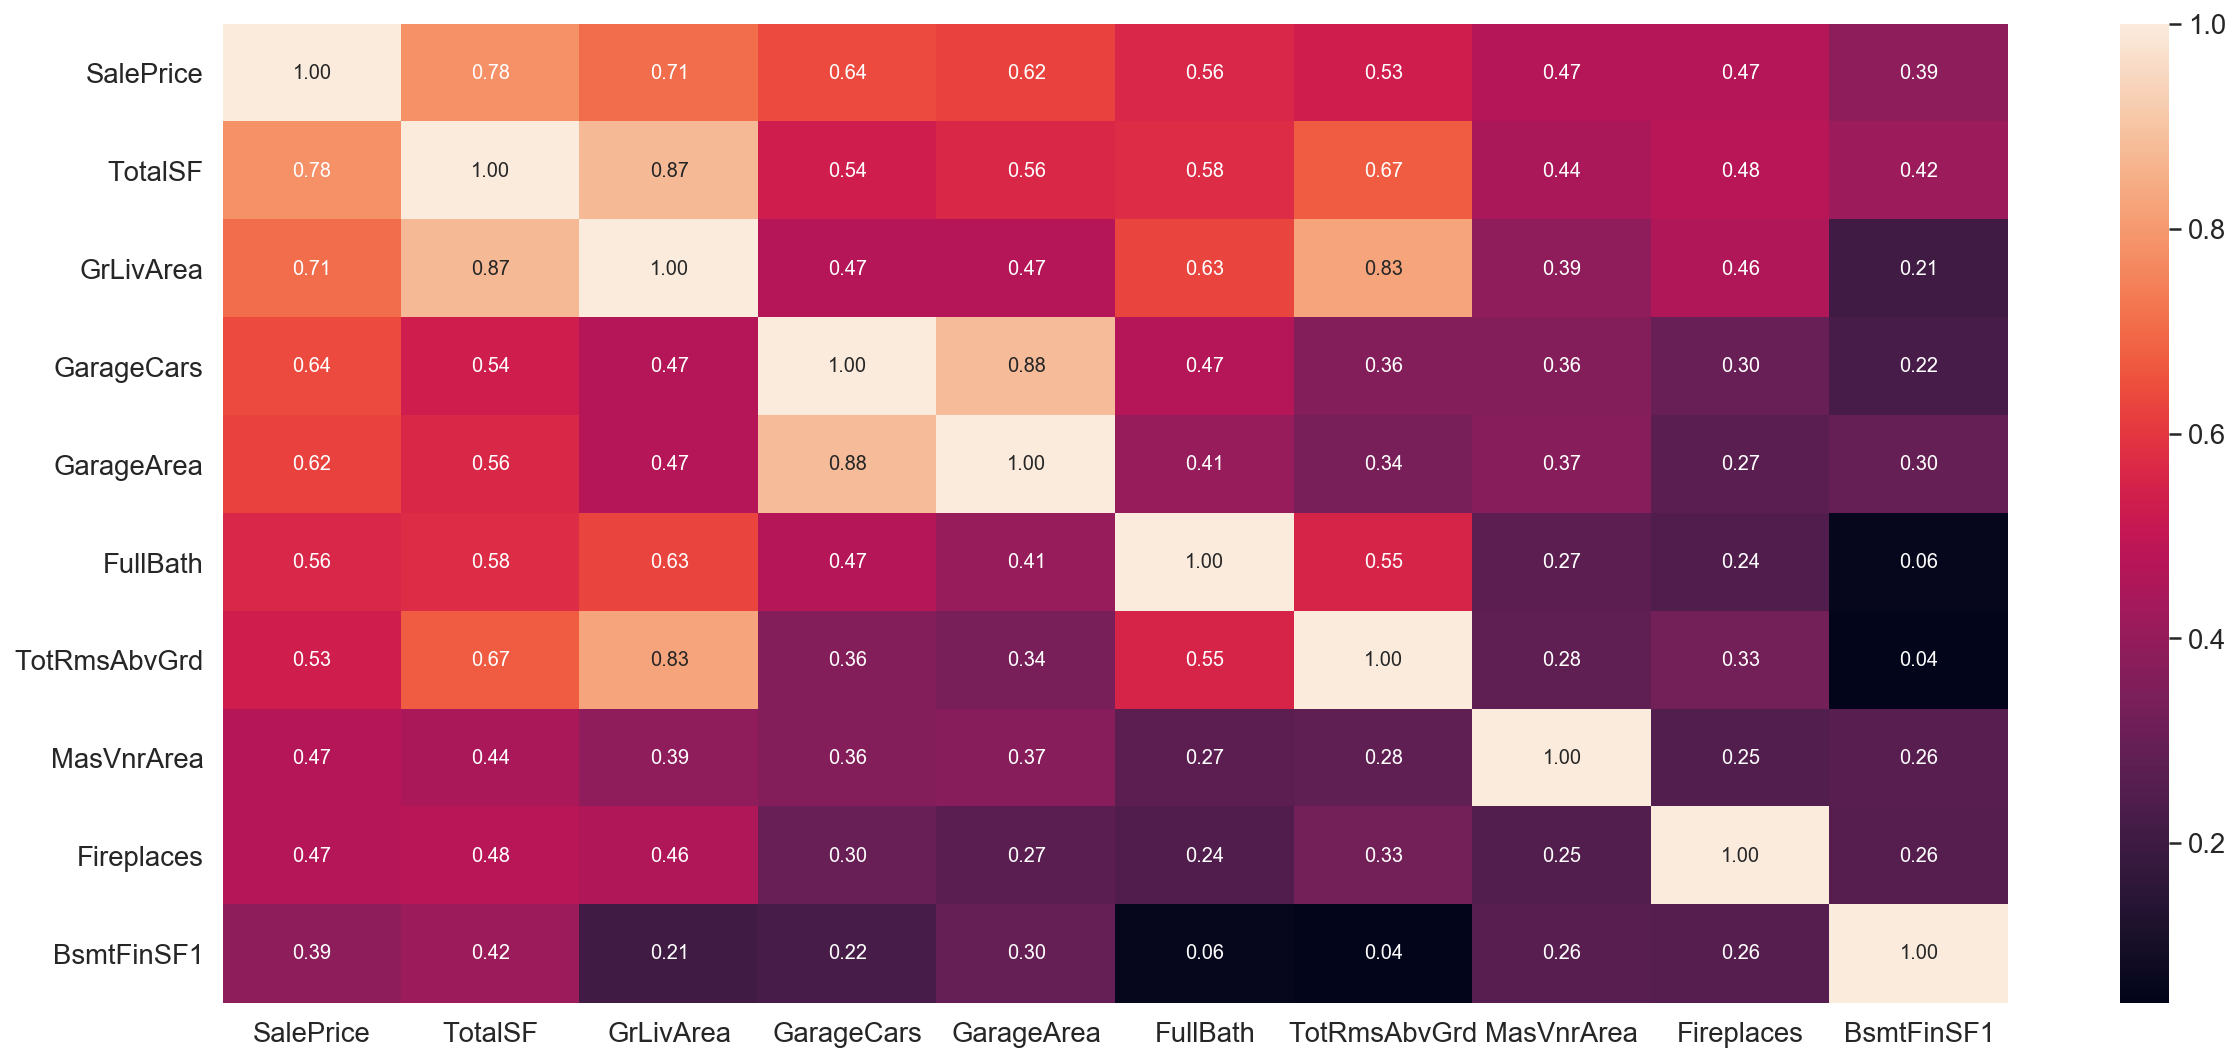

In [92]:
# Top 10 Heatmap
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(20,9))
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [93]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,TotalSF
2,GrLivArea
3,GarageCars
4,GarageArea
5,FullBath
6,TotRmsAbvGrd
7,MasVnrArea
8,Fireplaces
9,BsmtFinSF1


#### Scatter plot of the most correlated features with SalePrice

* OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
* GrLivArea: Above grade (ground) living area square feet
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* TotalBsmtSF: Total square feet of basement area
* 1stFlrSF: First Floor square feet
* FullBath: Full bathrooms above grade
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* YearBuilt: Original construction date


In [94]:
#  encoded columns as they are kind of incremental in nature
cols_LabelEncoder = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional',  'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive',  'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','GarageYrBlt','OverallQual','YearBuilt','YearRemodAdd']

# Process columns and apply LabelEncoder to categorical features
train_LabelEncoder = train[cols_LabelEncoder]
train_LabelEncoder.head()

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,KitchenQual,BsmtFinType1,...,PavedDrive,CentralAir,MSSubClass,OverallCond,YrSold,MoSold,GarageYrBlt,OverallQual,YearBuilt,YearRemodAdd
0,None,Gd,TA,TA,TA,Gd,TA,Ex,Gd,GLQ,...,Y,Y,60,5,2008,2,2003.0,5,2003,2003
1,TA,Gd,TA,TA,TA,TA,TA,Ex,TA,ALQ,...,Y,Y,20,8,2007,5,1976.0,8,1976,1976
2,TA,Gd,TA,TA,TA,Gd,TA,Ex,Gd,GLQ,...,Y,Y,60,5,2008,9,2001.0,5,2001,2002
3,Gd,TA,Gd,TA,TA,TA,TA,Gd,Gd,ALQ,...,Y,Y,70,5,2006,2,1998.0,5,1915,1970
4,TA,Gd,TA,TA,TA,Gd,TA,Ex,Gd,GLQ,...,Y,Y,60,5,2008,12,2000.0,5,2000,2000


In [95]:
from sklearn.preprocessing import LabelEncoder

for c in cols_LabelEncoder:
    lbl = LabelEncoder() 
    lbl.fit(list(train_LabelEncoder[c].values)) 
    train_LabelEncoder[c] = lbl.transform(list(train_LabelEncoder[c].values))    
    
train_LabelEncoder.head()

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,KitchenQual,BsmtFinType1,...,PavedDrive,CentralAir,MSSubClass,OverallCond,YrSold,MoSold,GarageYrBlt,OverallQual,YearBuilt,YearRemodAdd
0,3,2,4,5,5,2,4,0,2,2,...,2,1,9,4,2,4,90,4,104,53
1,5,2,4,5,5,3,4,0,3,0,...,2,1,4,7,1,7,63,7,77,26
2,5,2,4,5,5,2,4,0,2,2,...,2,1,9,4,2,11,88,4,102,52
3,2,4,1,5,5,3,4,2,2,0,...,2,1,10,4,0,4,85,4,19,20
4,5,2,4,5,5,2,4,0,2,2,...,2,1,9,4,2,3,87,4,101,50


In [96]:
# Drop the columns which are encoded in above steps as we require only other columns for which we need apply get_dummy process 
train.drop(cols_LabelEncoder,axis=1,inplace=True)
train.head()

,MSZoning,LotFrontage,LotArea,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,TotalSF
0,RL,65.0,8450,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,61,0,0,0,0,0,WD,Normal,208500,2566
1,RL,80.0,9600,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,...,0,0,0,0,0,0,WD,Normal,181500,2524
2,RL,68.0,11250,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,42,0,0,0,0,0,WD,Normal,223500,2706
3,RL,60.0,9550,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,...,35,272,0,0,0,0,WD,Abnorml,140000,2473
4,RL,84.0,14260,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,...,84,0,0,0,0,0,WD,Normal,250000,3343


In [97]:
train_categorical = train.select_dtypes(include=['object'])
train_categorical.head()


,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,SaleType,SaleCondition
0,RL,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,WD,Normal
1,RL,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,WD,Normal
2,RL,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,WD,Normal
3,RL,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,WD,Abnorml
4,RL,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,WD,Normal


### Get dummies

In [98]:
train_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [99]:
train_final = pd.concat([train_dummies, train_numeric, train_LabelEncoder], axis=1)
train_final.head(10)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,PavedDrive,CentralAir,MSSubClass,OverallCond,YrSold,MoSold,GarageYrBlt,OverallQual,YearBuilt,YearRemodAdd
0,0,0,1,0,0,0,1,0,0,0,...,2,1,9,4,2,4,90,4,104,53
1,0,0,1,0,0,0,1,0,1,0,...,2,1,4,7,1,7,63,7,77,26
2,0,0,1,0,0,0,1,0,0,0,...,2,1,9,4,2,11,88,4,102,52
3,0,0,1,0,0,0,1,0,0,0,...,2,1,10,4,0,4,85,4,19,20
4,0,0,1,0,0,0,1,0,1,0,...,2,1,9,4,2,3,87,4,101,50
5,0,0,1,0,0,0,1,0,0,0,...,2,1,8,4,3,1,80,4,94,45
6,0,0,1,0,0,0,1,0,0,0,...,2,1,4,4,1,10,91,4,105,55
7,0,0,1,0,0,0,1,0,0,0,...,2,1,9,5,3,2,60,5,74,23
8,0,0,0,1,0,0,1,0,0,0,...,2,1,8,4,2,6,20,4,35,0
9,0,0,1,0,0,0,1,0,0,0,...,2,1,3,5,2,0,28,5,42,0


#### Let's take some deep look at how each relates to Sale Price and remove outliers if necessary

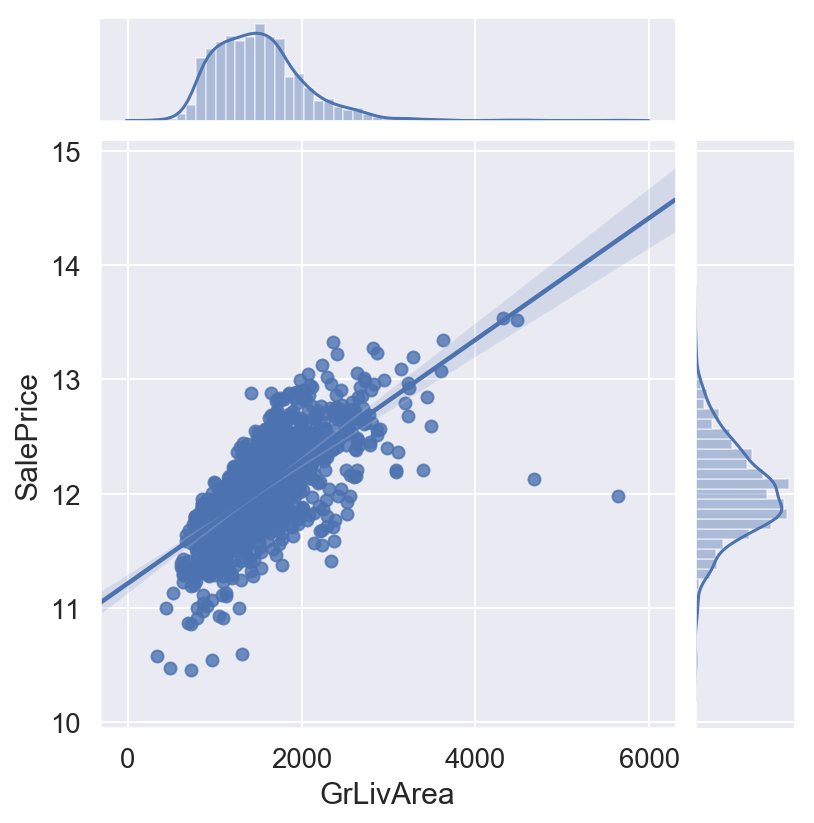

(0.700926987142715, 3.058151110246634e-216)


In [100]:
# Living Area vs Sale Price
sns.jointplot(x=train_final['GrLivArea'], y=train_final['SalePrice'], kind='reg')
plt.show()

print(scipy.stats.pearsonr(x=train_final['GrLivArea'], y=train_final['SalePrice']))

This looks something reasonable. People would pay more for the more living area. 
<b> But, there is a key observation, the two datapoints in the bottom-right of the plot, which is something un-expected and hence the outliers </b>
We need to take care of this! We will remove these outliers manually !!

In [101]:
# Removing outliers manually (Two points in the bottom right)
train_final = train_final.drop(train_final[(train_final['GrLivArea']>4000) 
                         & (train_final['SalePrice']<300000)].index).reset_index(drop=True)

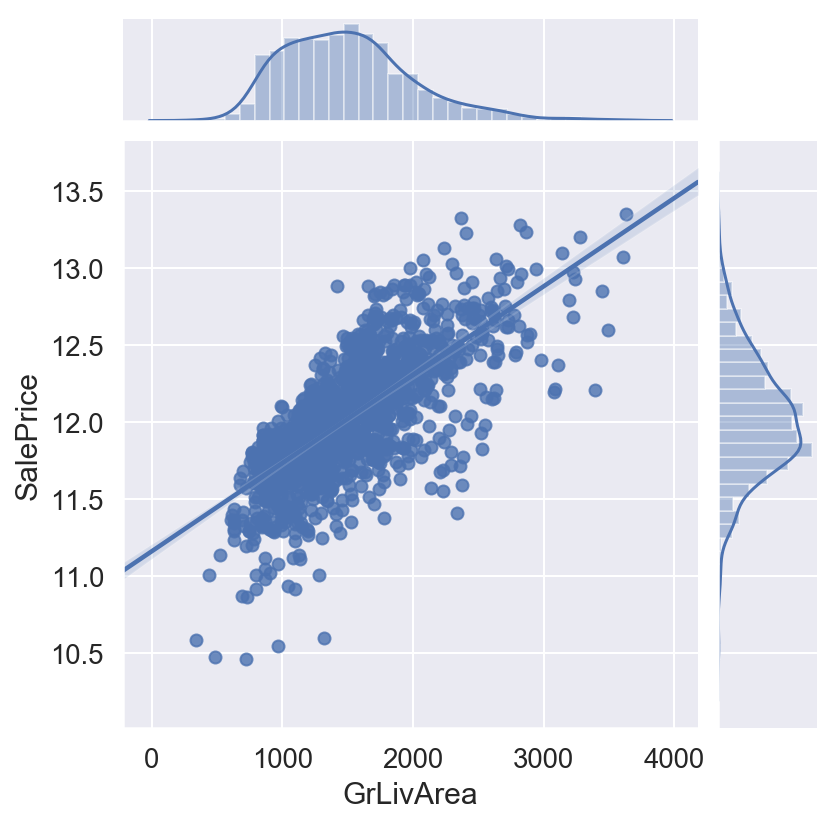

(0.7188444008280217, 7.327052760045529e-232)


In [102]:
# Living Area vs Sale Price
sns.jointplot(x=train_final['GrLivArea'], y=train_final['SalePrice'], kind='reg')
plt.show()
print(scipy.stats.pearsonr(x=train_final['GrLivArea'], y=train_final['SalePrice']))

Nice! We got a approx. <b>0.02</b> point increase in the Pearson-R Score.

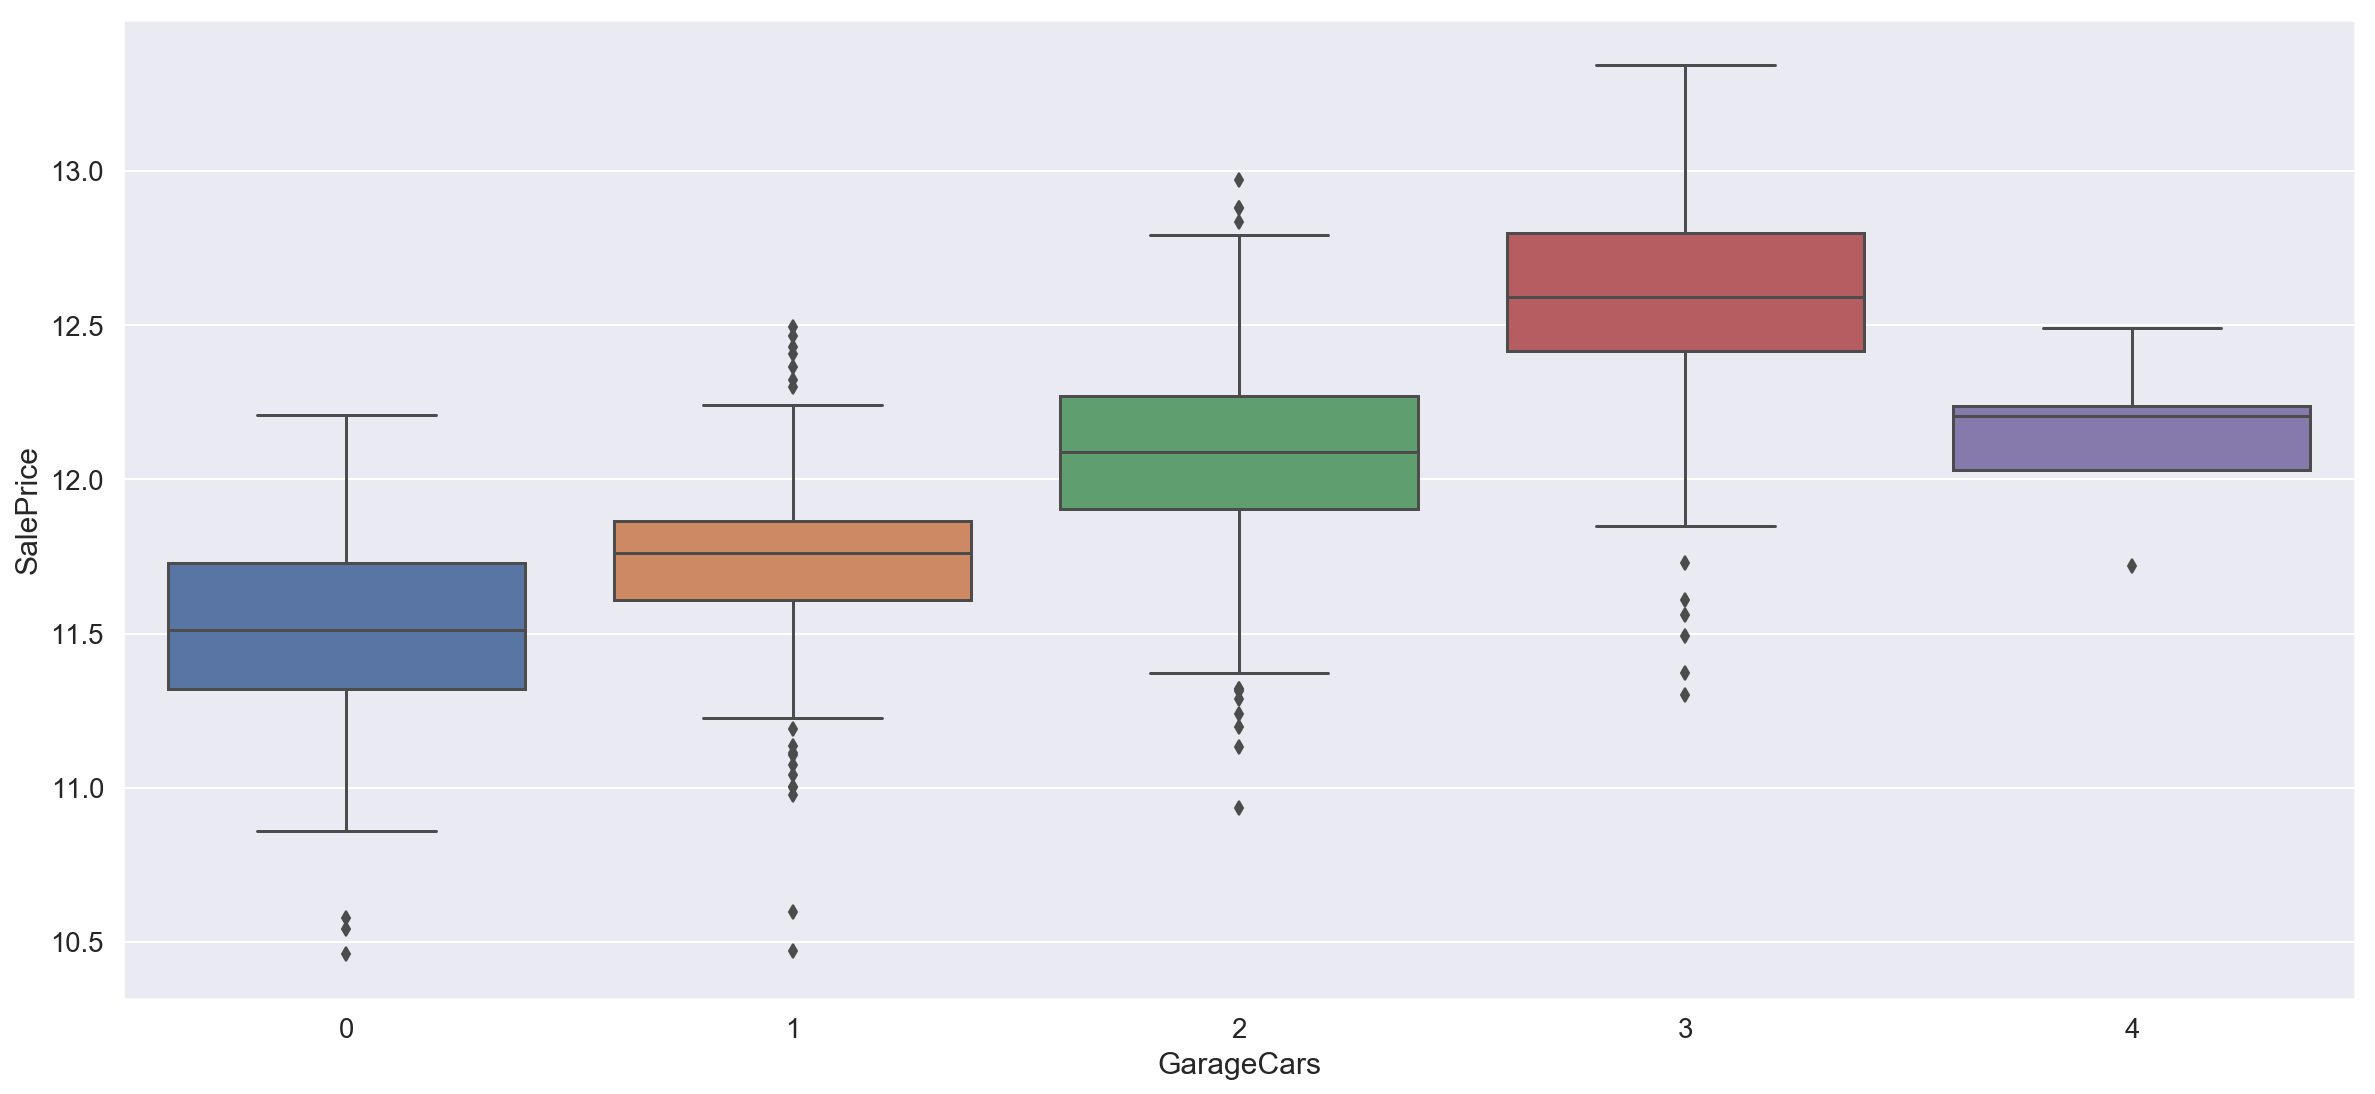

In [103]:
# Garage Area vs Sale Price
plt.subplots(figsize=(20,9))
sns.boxplot(x=train_final['GarageCars'], y=train_final['SalePrice'])
plt.show()

<b>Observation:</b> 4-car garages result in less Sale Price. 
Means this doesn't make much sense, So, let's remove those outliers

In [104]:
# Removing outliers manually (More than 4-cars, less than $300k)
train_final = train_final.drop(train_final[(train_final['GarageCars']>3) 
                         & (train_final['SalePrice']<300000)].index).reset_index(drop=True)

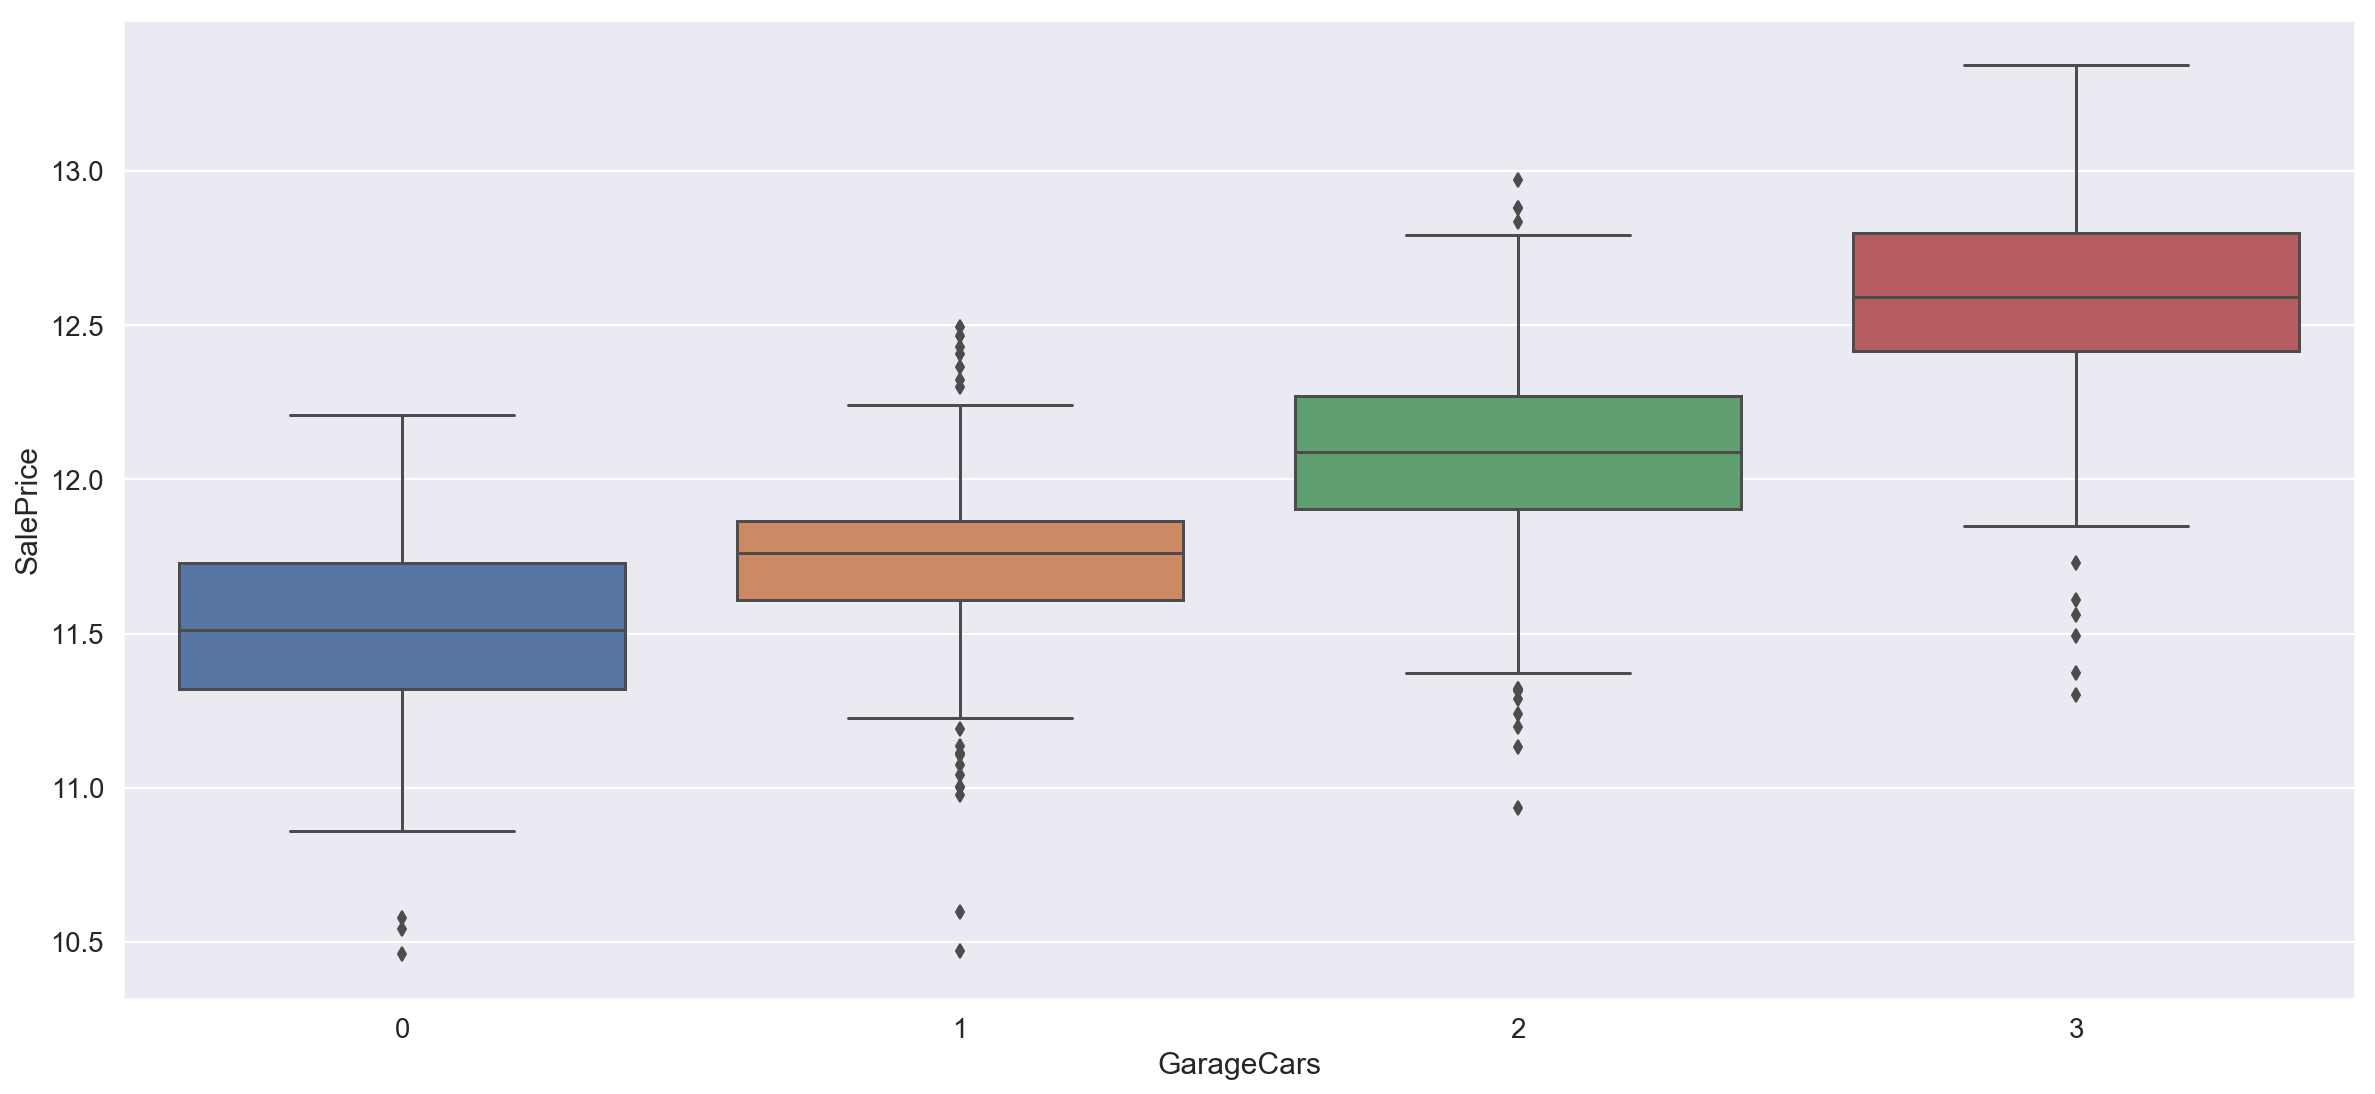

In [105]:
# Garage Area vs Sale Price
plt.subplots(figsize=(20,9))
sns.boxplot(x=train_final['GarageCars'], y=train_final['SalePrice'])
plt.show()

<b>Observation: </b>This looks somehow better

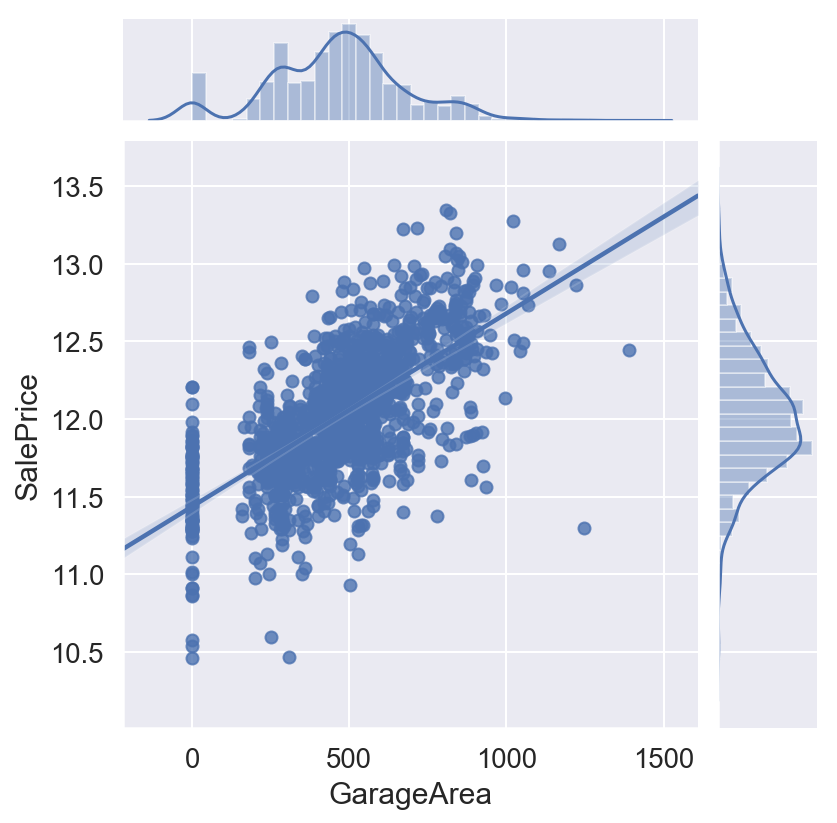

(0.6594133228999396, 9.074219087668421e-182)


In [106]:
# Garage Area vs Sale Price
sns.jointplot(x=train_final['GarageArea'], y=train_final['SalePrice'], kind='reg')
plt.show()
print(scipy.stats.pearsonr(x=train_final['GarageArea'], y=train_final['SalePrice']))

<b>Observation: </b>Its fine !

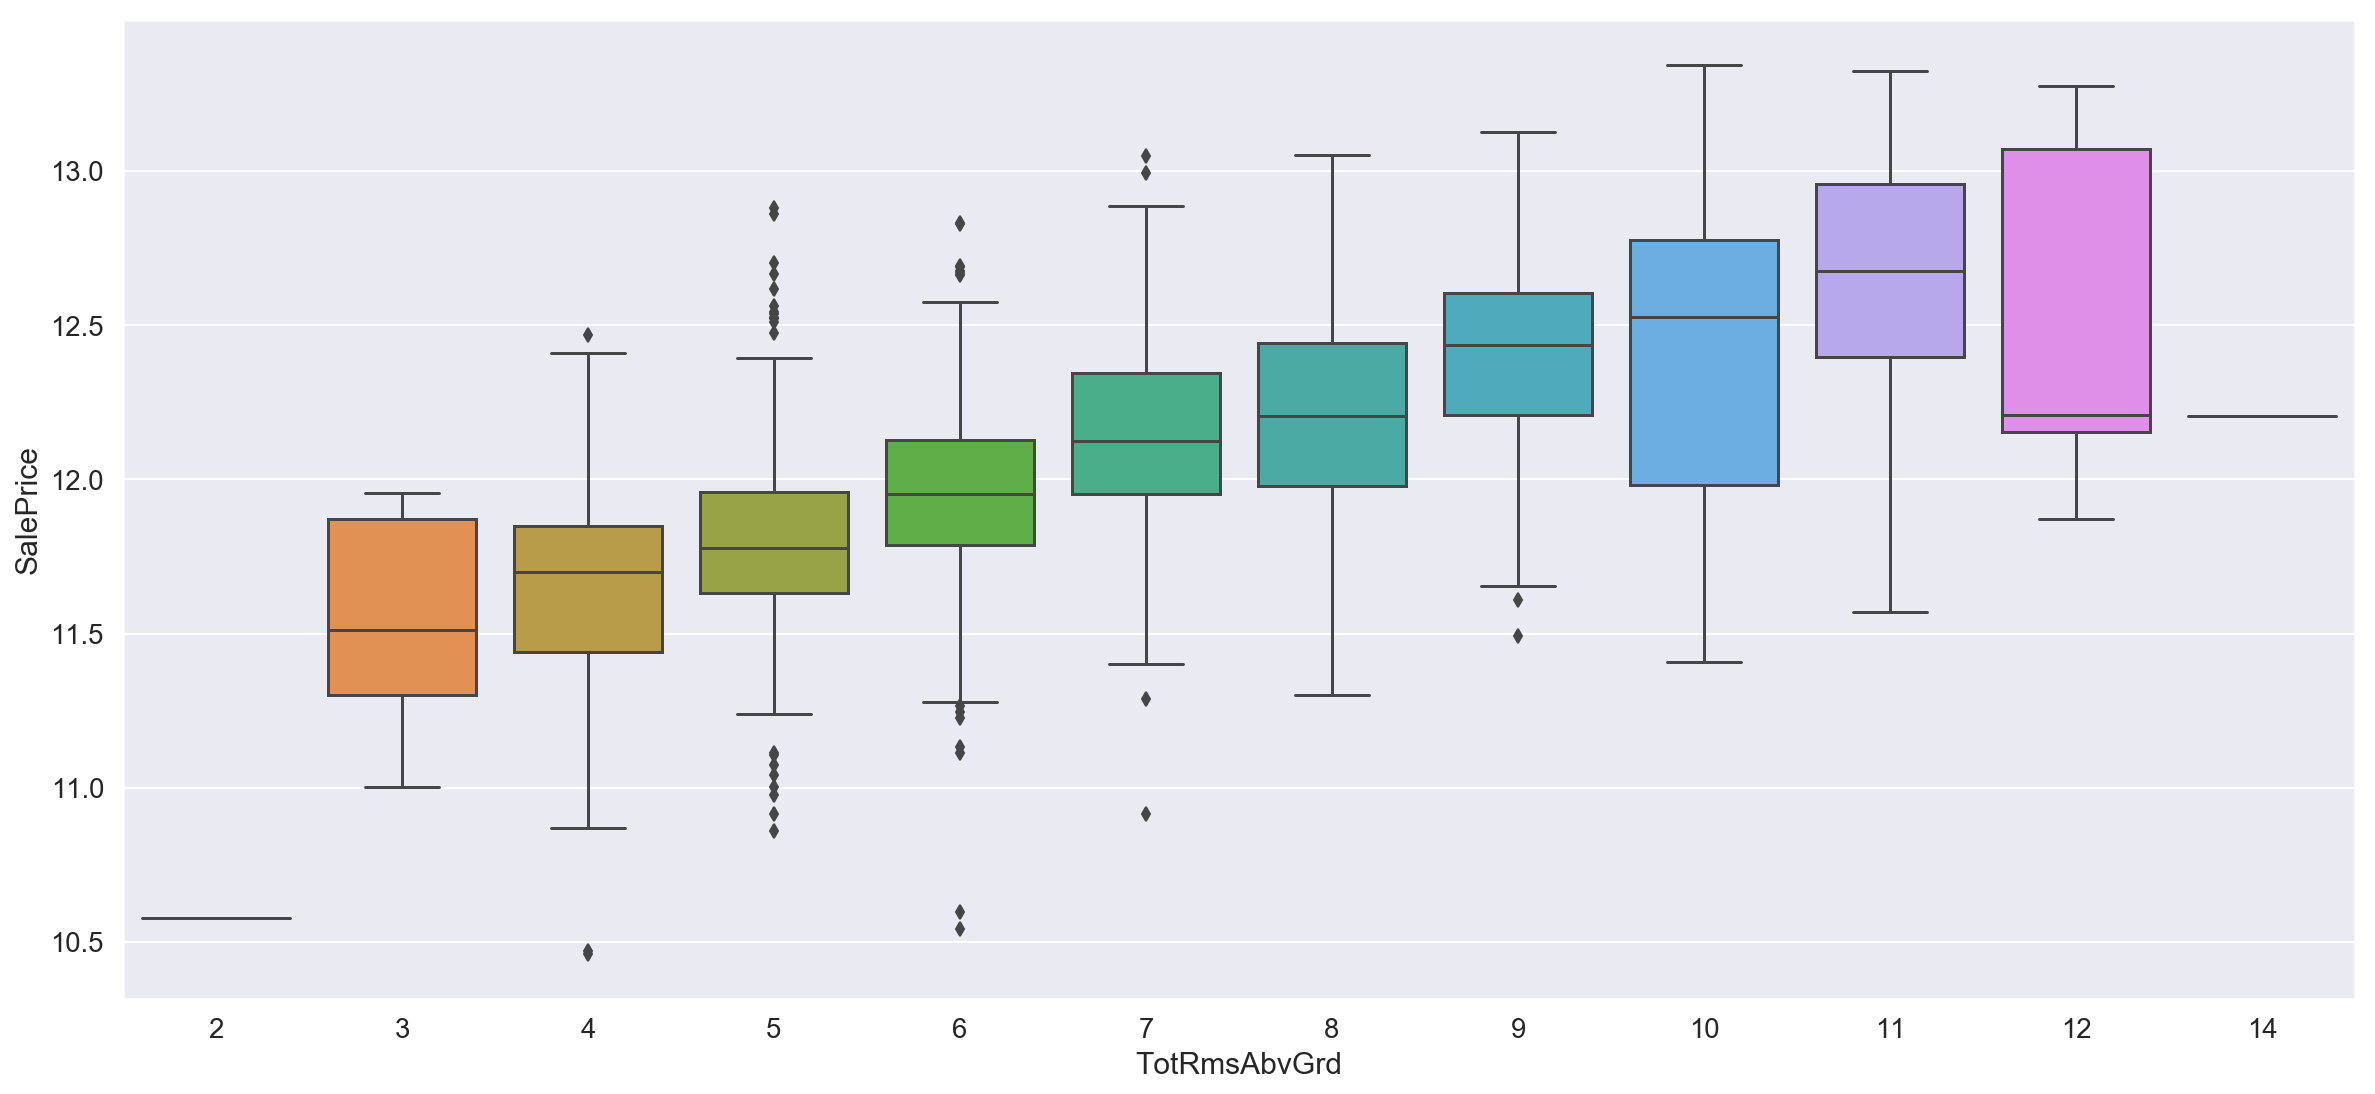

In [107]:
# Total Rooms vs Sale Price
plt.subplots(figsize=(20,9))
sns.boxplot(x=train_final['TotRmsAbvGrd'], y=train_final['SalePrice'])

<b>Obervation: </b>IF we see carefully, the house with room 12 and more looks something un-usual. 
It looks like an outlier but will let it be for now now observe going further if this creates any issue with our analyis.

In [108]:
train_final.head(10)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,PavedDrive,CentralAir,MSSubClass,OverallCond,YrSold,MoSold,GarageYrBlt,OverallQual,YearBuilt,YearRemodAdd
0,0,0,1,0,0,0,1,0,0,0,...,2,1,9,4,2,4,90,4,104,53
1,0,0,1,0,0,0,1,0,1,0,...,2,1,4,7,1,7,63,7,77,26
2,0,0,1,0,0,0,1,0,0,0,...,2,1,9,4,2,11,88,4,102,52
3,0,0,1,0,0,0,1,0,0,0,...,2,1,10,4,0,4,85,4,19,20
4,0,0,1,0,0,0,1,0,1,0,...,2,1,9,4,2,3,87,4,101,50
5,0,0,1,0,0,0,1,0,0,0,...,2,1,8,4,3,1,80,4,94,45
6,0,0,1,0,0,0,1,0,0,0,...,2,1,4,4,1,10,91,4,105,55
7,0,0,1,0,0,0,1,0,0,0,...,2,1,9,5,3,2,60,5,74,23
8,0,0,0,1,0,0,1,0,0,0,...,2,1,8,4,2,6,20,4,35,0
9,0,0,1,0,0,0,1,0,0,0,...,2,1,3,5,2,0,28,5,42,0


### Fixing "skewed" features.
Here, we fix all of the skewed data to be more normal so that our models will be more accurate when making predictions.


 mu = 12.02 and sigma = 0.40



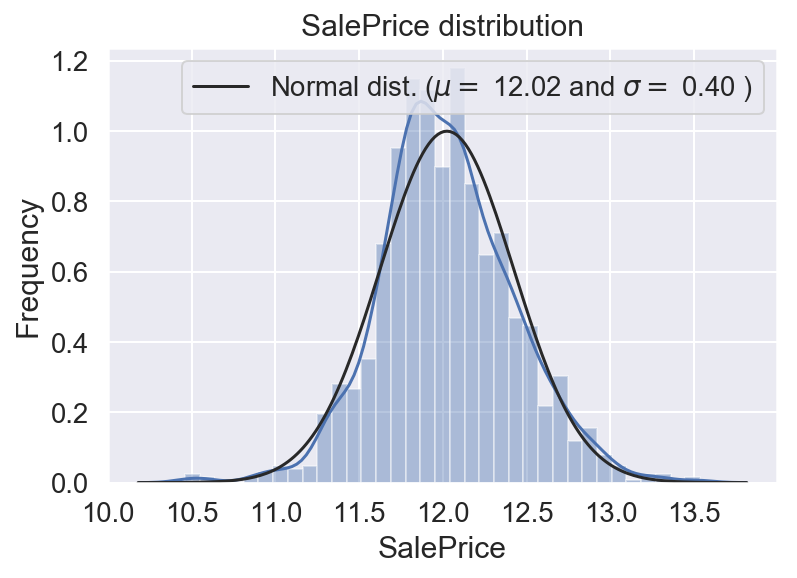

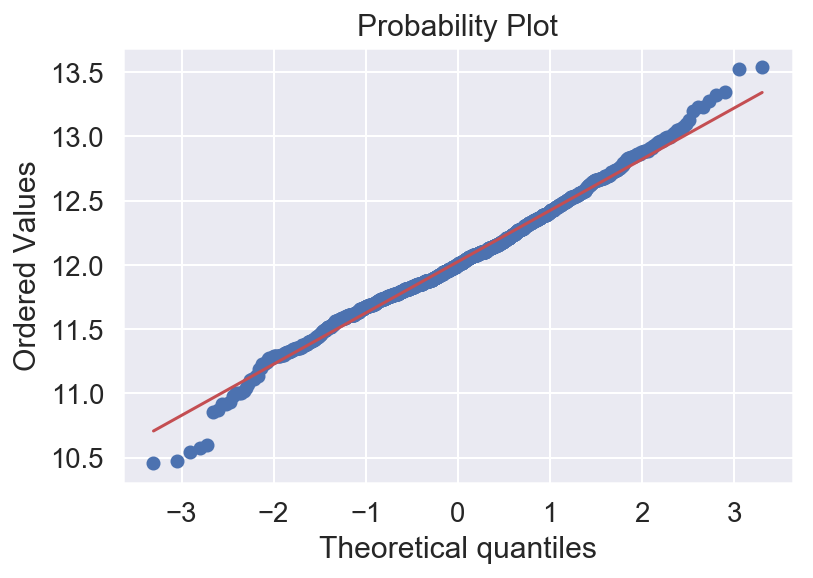

Skewness: 0.121347
Kurtosis: 0.809519


In [109]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

y_train = train.SalePrice.values

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

# 7. Model Building and Evaluation

In [110]:
#spliting the X and Y varibale needed for Model
X = train_final.loc[:, train_final.columns != 'SalePrice']
y = train_final.loc[:, train_final.columns == 'SalePrice']

In [111]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

C:\Users\KUR9KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       ...
       'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold',
       'MoSold', 'GarageYrBlt', 'OverallQual', 'YearBuilt', 'YearRemodAdd'],
      dtype='object', length=176)

In [112]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [113]:
# Printing the train and test split shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 176)
(436, 176)
(1015, 1)
(436, 1)


## Lasso

In [114]:
params = {'alpha': [0.0001, 0.001,0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20 ]}

# cross validation
folds = 5
lasso = Lasso()
# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\KUR9KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\KUR9KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\KUR9KOR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\U

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [115]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.087883,0.013587,0.001196,0.000746,0.0001,{'alpha': 0.0001},-0.096679,-0.083830,-0.085600,-0.090340,...,-0.089725,0.004616,3,-0.063610,-0.067823,-0.066310,-0.066909,-0.066602,-0.066251,0.001415
1,0.020286,0.004969,0.001006,0.000902,0.001,{'alpha': 0.001},-0.090521,-0.082688,-0.080135,-0.084806,...,-0.084713,0.003444,1,-0.065993,-0.069572,-0.068981,-0.069206,-0.068587,-0.068468,0.001278
2,0.006248,0.007653,0.003125,0.006250,0.01,{'alpha': 0.01},-0.089277,-0.079770,-0.091331,-0.084244,...,-0.087394,0.004726,2,-0.080988,-0.083168,-0.081904,-0.082233,-0.081761,-0.082011,0.000708
3,0.009622,0.007405,0.000798,0.000747,0.1,{'alpha': 0.1},-0.166408,-0.136137,-0.147800,-0.142449,...,-0.153829,0.015128,4,-0.151904,-0.154468,-0.154174,-0.151567,-0.152146,-0.152852,0.001217
4,0.004389,0.000488,0.001397,0.000491,0.2,{'alpha': 0.2},-0.248600,-0.210327,-0.223957,-0.202538,...,-0.228702,0.021467,5,-0.227164,-0.231270,-0.228992,-0.226608,-0.227405,-0.228288,0.001688


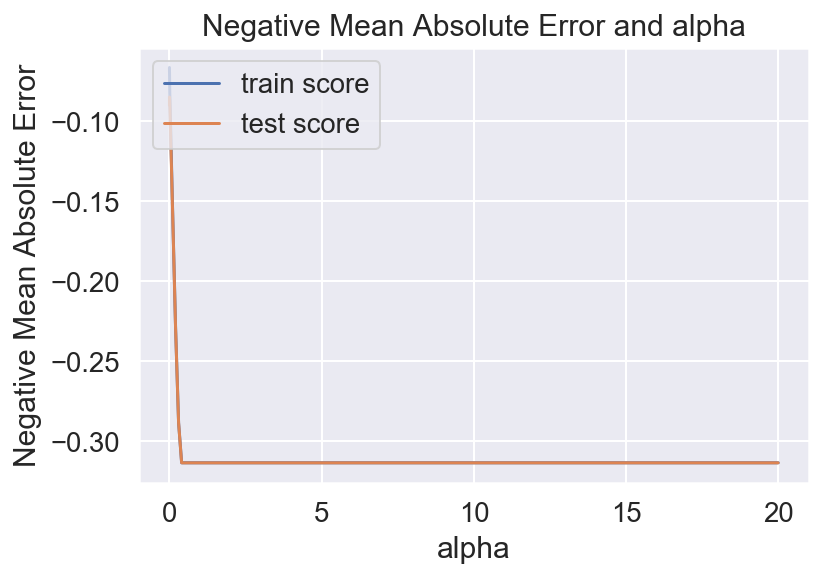

In [116]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

##### Observation
A value of alpha =0.01 is the right choice based on the plot above and the cv_results_lasso dataframe score

In [117]:
alpha =0.01

lasso_final = Lasso(alpha=alpha)
        
lasso_final.fit(X_train, y_train) 

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
# lasso model parameters
model_parameters_lasso = list(lasso_final.coef_)
model_parameters_lasso = [round(x, 2)  for x in model_parameters_lasso]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_lasso))

[('constant', 0.01),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', 0.01),
 ('MSZoning_RL', -0.0),
 ('MSZoning_RM', 0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_BrDale', 0.0),
 ('Neighborhood_BrkSide', 0.0),
 ('Neighborhood_ClearCr', 0.0),
 ('Neighborhood_CollgCr', 0.01),
 ('Neighborhood_Crawfor', -0.0),
 ('Neighborhood_Edwards', -0.0),
 ('Neighborhood_Gilbert', -0.01),
 ('Neighborhood_IDOTRR', -0.01),
 ('Neighborhood_MeadowV', -0.0),
 ('Neighborhood_Mitchel', 0.0),
 ('Neighborhood_NAmes', -0.0),
 ('Neighborhood_NPkVill', -0.0),
 ('Neighborhood_NWAmes', 0.0),
 ('Neighborhood_NoRidge', 0.0),
 ('Neighborhood_NridgHt', -0.0),
 ('Neighborhood_OldTown', -0.0),
 ('Neighborhood_SWISU', -0.0),
 ('Neighborhood_Sawyer', -0.0),
 ('Neighborhood_SawyerW', 0.0),
 ('Neighborhood_Somerst', 0.0),
 ('Neighborho

In [119]:
lasso_final.coef_

array([ 6.62526889e-03, -0.00000000e+00,  1.34922780e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.26943065e-03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.34202705e-02, -0.00000000e+00, -0.00000000e+00, -8.13266345e-03,
       -8.93422630e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  4.81781357e-03, -4.89669461e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  4.36310771e-03,
        2.96934044e-03,  0.00000000e+00,  3.01294507e-05, -0.00000000e+00,
        3.65308149e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -3.63364203e-03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [120]:
coef = pd.Series(lasso_final.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and from a total of " +  str(coef.size) + " variables")

Lasso picked 48 variables and from a total of 176 variables


Lasso picked 48 variables and from a total of 176 variables


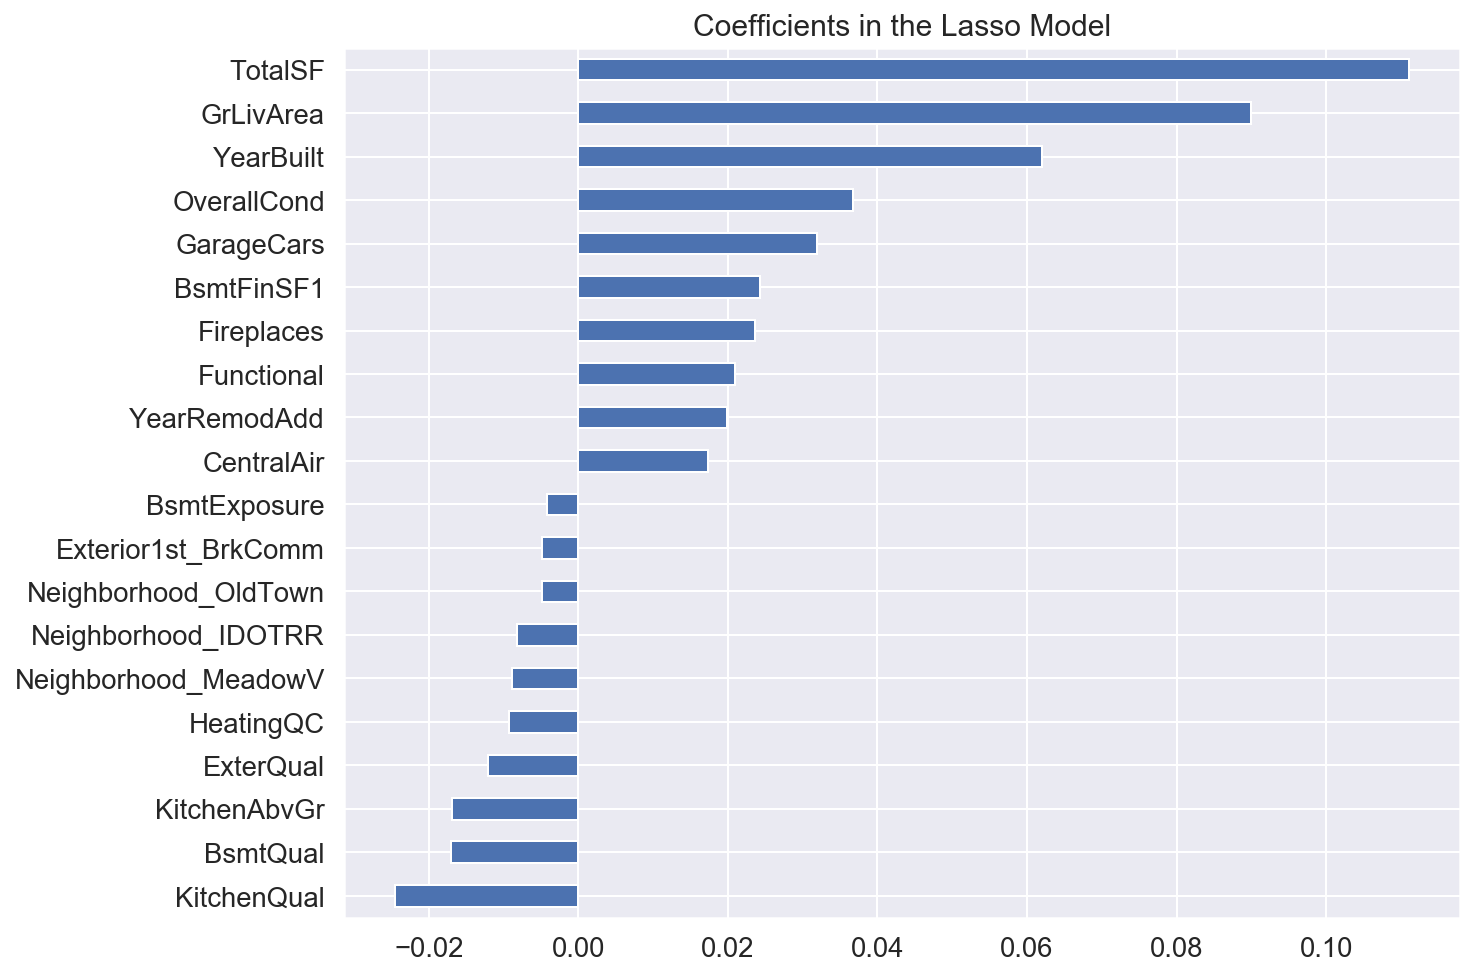

In [121]:
lasso_coef = pd.Series(lasso_final.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(lasso_coef != 0)) + " variables and from a total of " +  str(lasso_coef.size) + " variables")
plt.figure(figsize=(10,8))
lasso_imp_coefs = pd.concat([lasso_coef.sort_values().head(10),
                     lasso_coef.sort_values().tail(10)])
lasso_imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

##### Top 10 feature from Lasso are
- TotalSF: sum of 'TotalBsmtSF','1stFlrSF'],'2ndFlrSF' 
- GrLivArea: Above grade (ground) living area square feet 
- OverallCond: Rates the overall condition of the house
- GarageCars: Size of garage in car capacity
- Fireplaces: Number of fireplaces
- BsmtFinSF1: Type 1 finished square feet 
- Functional: Home functionality (Assume typical unless deductions are warranted)  
- GarageArea: Size of garage in square feet
- YearBuilt: Original construction date 
- CentralAir: Central air conditioning

## Ridge

In [122]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [123]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006983,0.000632,0.002193,0.000747,0.0001,{'alpha': 0.0001},-0.098822,-0.084274,-0.087345,-0.092108,...,-0.091280,0.005075,27,-0.063402,-0.067808,-0.066162,-0.066733,-0.066410,-0.066103,0.001463
1,0.007183,0.000978,0.002193,0.000399,0.001,{'alpha': 0.001},-0.098820,-0.084273,-0.087344,-0.092102,...,-0.091278,0.005074,26,-0.063402,-0.067808,-0.066162,-0.066733,-0.066410,-0.066103,0.001463
2,0.009377,0.002863,0.002191,0.000394,0.01,{'alpha': 0.01},-0.098806,-0.084265,-0.087341,-0.092043,...,-0.091260,0.005070,25,-0.063404,-0.067808,-0.066163,-0.066737,-0.066412,-0.066105,0.001462
3,0.007382,0.000489,0.001793,0.000398,0.05,{'alpha': 0.05},-0.098744,-0.084234,-0.087326,-0.091813,...,-0.091186,0.005052,24,-0.063413,-0.067806,-0.066167,-0.066755,-0.066420,-0.066112,0.001460
4,0.007981,0.000002,0.001993,0.000003,0.1,{'alpha': 0.1},-0.098670,-0.084203,-0.087308,-0.091579,...,-0.091106,0.005032,23,-0.063424,-0.067804,-0.066173,-0.066775,-0.066430,-0.066121,0.001458


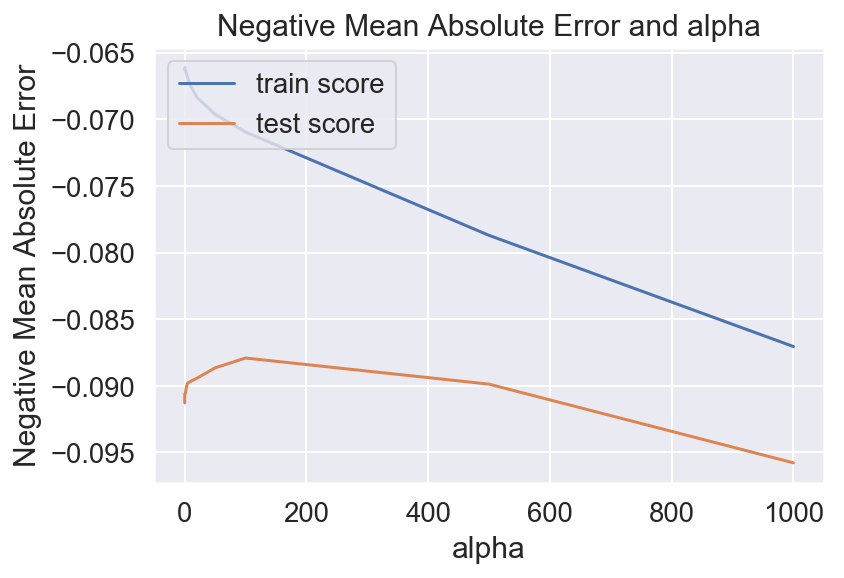

In [124]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Observation
A value of alpha = 100 is the right choice based on the plot above and the cv_results_ridge dataframe score

In [125]:
alpha = 100
ridge_final = Ridge(alpha=alpha)

ridge_final.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [126]:
ridge_final.coef_

array([[ 1.68150104e-02, -1.12950709e-03,  2.63073941e-02,
         1.35709797e-02,  6.26476420e-03,  3.61703563e-03,
         1.80423150e-03,  9.42704953e-03, -5.09359635e-03,
        -3.07767742e-03, -3.10077720e-03, -1.30313444e-03,
        -3.02118354e-03,  1.46703184e-03,  1.21304918e-03,
         6.62987253e-04,  1.93114240e-02, -6.80399454e-03,
        -4.12781612e-03, -2.03743014e-02, -1.86896394e-02,
        -6.75377235e-03, -4.42068654e-03,  7.76729445e-04,
        -5.00964118e-03,  9.89124910e-03,  1.70563553e-02,
        -1.63160470e-02, -2.14893453e-03, -3.94318830e-03,
         2.89507442e-04,  1.33022386e-02,  1.59655770e-02,
         1.93708960e-03,  6.93234801e-03, -1.89310639e-03,
         9.89356465e-03,  2.21365994e-04,  2.14275073e-03,
        -4.02006162e-03,  5.09518652e-04, -2.78789465e-03,
         6.29635500e-03,  4.55782235e-04,  1.70488699e-03,
        -7.04767729e-03, -1.66929792e-04,  5.91687686e-03,
        -5.30287953e-03, -1.06435755e-03,  8.57832522e-0

In [127]:
# lasso model parameters
model_parameters_ridge = list(ridge_final.coef_)
model_parameters_ridge = [round(x, 2)  for x in model_parameters_ridge[0]]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_ridge))

[('constant', 0.02),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', 0.03),
 ('MSZoning_RL', 0.01),
 ('MSZoning_RM', 0.01),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.01),
 ('LotConfig_CulDSac', -0.01),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_BrDale', 0.0),
 ('Neighborhood_BrkSide', 0.0),
 ('Neighborhood_ClearCr', 0.0),
 ('Neighborhood_CollgCr', 0.02),
 ('Neighborhood_Crawfor', -0.01),
 ('Neighborhood_Edwards', -0.0),
 ('Neighborhood_Gilbert', -0.02),
 ('Neighborhood_IDOTRR', -0.02),
 ('Neighborhood_MeadowV', -0.01),
 ('Neighborhood_Mitchel', -0.0),
 ('Neighborhood_NAmes', 0.0),
 ('Neighborhood_NPkVill', -0.01),
 ('Neighborhood_NWAmes', 0.01),
 ('Neighborhood_NoRidge', 0.02),
 ('Neighborhood_NridgHt', -0.02),
 ('Neighborhood_OldTown', -0.0),
 ('Neighborhood_SWISU', -0.0),
 ('Neighborhood_Sawyer', 0.0),
 ('Neighborhood_SawyerW', 0.01),
 ('Neighborhood_Somerst', 0.02),
 ('

Ridge picked 176 features and eliminated the other 0 features


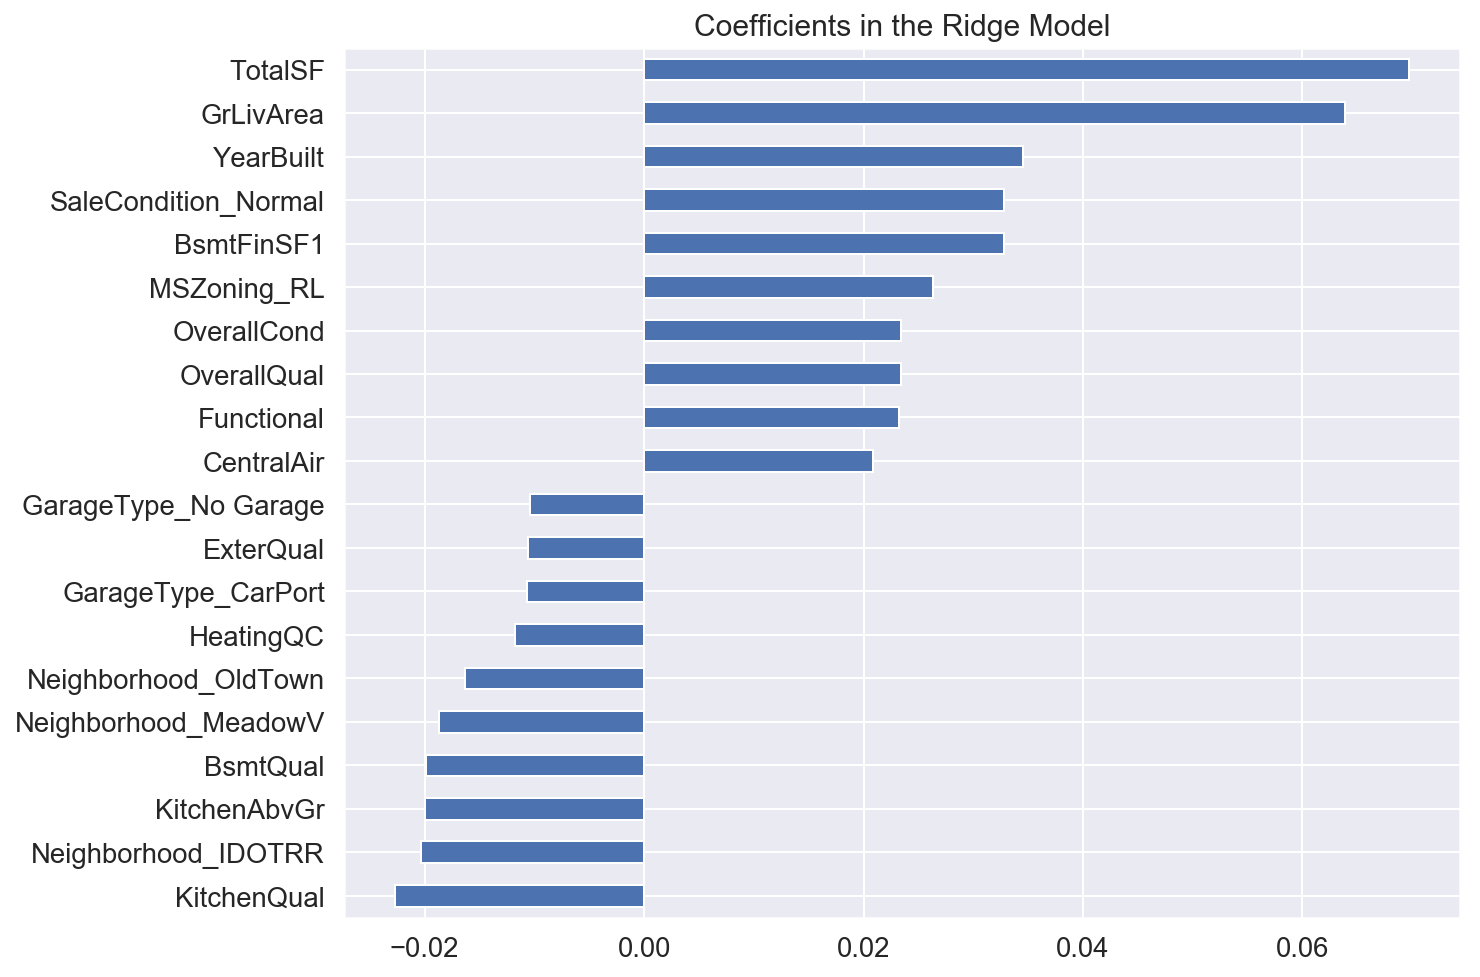

In [128]:
# Plot important coefficients
plt.figure(figsize=(10,8))
ridge_coef = pd.Series(ridge_final.coef_[0], index = X_train.columns)
print("Ridge picked " + str(sum(ridge_coef != 0)) + " features and eliminated the other " +  \
      str(sum(ridge_coef == 0)) + " features")
imp_coefs = pd.concat([ridge_coef.sort_values().head(10),
                     ridge_coef.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


##### Top 10 feature from Ridge are
- TotalSF: sum of 'TotalBsmtSF','1stFlrSF'],'2ndFlrSF' 
- GrLivArea: Above grade (ground) living area square feet
- YearBuilt: Original construction date
- BsmtFinSF1: Type 1 finished square feet 
- SaleCondition: Condition of sale - Only of the type Normal Sale
- OverallCond: Rates the overall condition of the house
- OverallQual: Rates the overall material and finish of the house
- Neighborhood: Physical locations within Ames city limits - Only for Crawford
- MSZoning: Identifies the general zoning classification of the sale. - Only Residential Low Density
- Functional: Home functionality (Assume typical unless deductions are warranted)  

### R Square

In [129]:
# predict r-square for Lasso Model
y_train_pred = lasso_final.predict(X_train)
print("Laso R Square Training set : ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso_final.predict(X_test)
print("Laso R Square Test set : ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Laso R Square Training set :  0.9158625555001255
Laso R Square Test set :  0.879778947145877


In [130]:
# predict r-square for Ridge Model
y_train_pred = ridge_final.predict(X_train)
print("Ridge R Square Training set : ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge_final.predict(X_test)
print("Ridge R Square Training set : ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Ridge R Square Training set :  0.9384280751007009
Ridge R Square Training set :  0.8821144037908444


### RMSE

In [131]:
def rmse_cv_train(model):
    cross_scores= cross_val_score(model, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
    cross_scores_corrected = np.sqrt(-1 * cross_scores)
    return(cross_scores_corrected)

def rmse_cv_test(model):
    cross_scores= cross_val_score(model, X_test, y_test, scoring = "neg_mean_squared_error", cv = 5)
    cross_scores_corrected = np.sqrt(-1 * cross_scores)
    return(cross_scores_corrected)

In [132]:
print("Lasso RMSE on Training set :", rmse_cv_train(lasso_final).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso_final).mean())

Lasso RMSE on Training set : 0.12425214404440303
Lasso RMSE on Test set : 0.1439911931793745


In [133]:
print("Ridge RMSE on Training set :", rmse_cv_train(ridge_final).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge_final).mean())

Ridge RMSE on Training set : 0.12338570986022046
Ridge RMSE on Test set : 0.1415417514864235


### Ridge Model

In [134]:
y_train_rdg = ridge_final.predict(X_train)
y_test_rdg = ridge_final.predict(X_test)

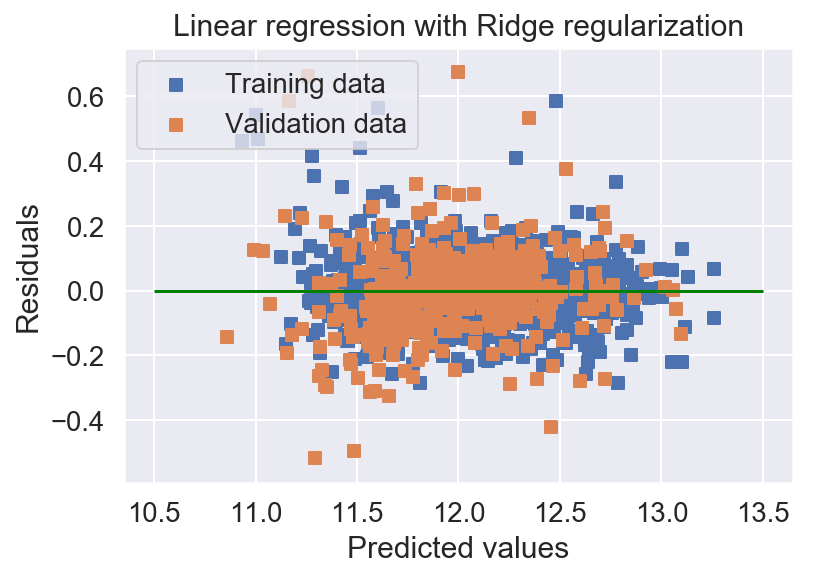

In [135]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "green")
plt.show()

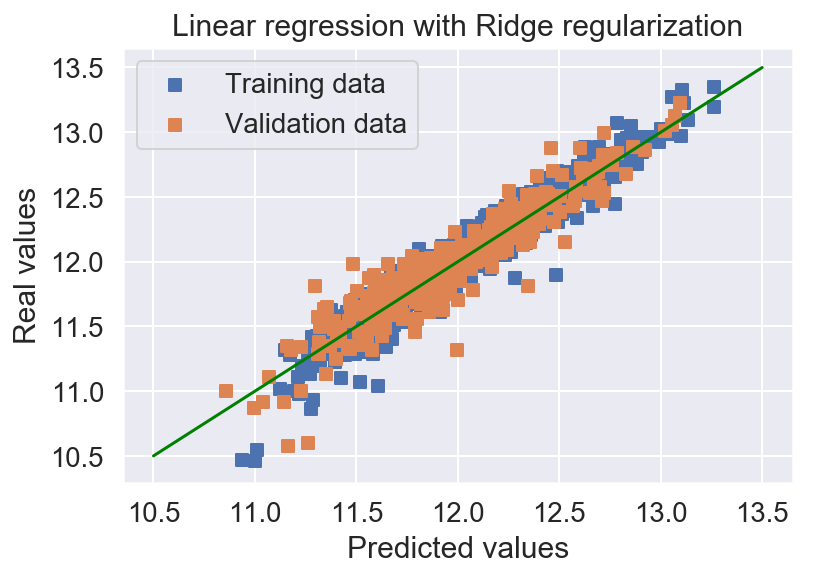

In [136]:
# Plot predictions
plt.scatter(y_train_rdg, y_train,marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "green")
plt.show()

### Lasso Model

In [137]:
y_train_lasso = lasso_final.predict(X_train)
y_test_lasso = lasso_final.predict(X_test)

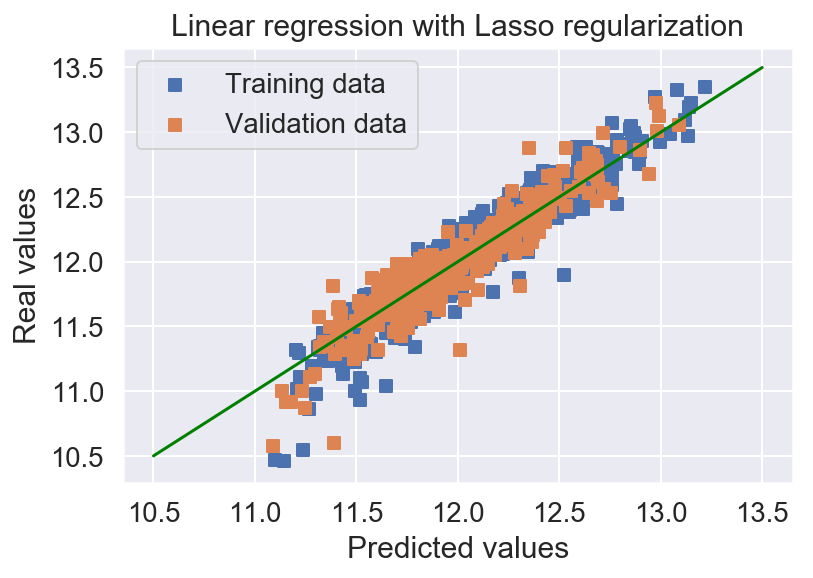

In [138]:
# Plot predictions
plt.scatter(y_train_lasso, y_train,  marker = "s", label = "Training data")
plt.scatter(y_test_lasso, y_test,  marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "green")
plt.show()

# 10. Conclusion

Overall Lasso Model looks fine due to following reasons:
- Alpha value: When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 0.01 is about right based on the Lasso plot above. 
- Complexity and Error: Lasso model seems to have same training error with only 48 features selected and for test data RMSE also lower compare to the Ridge model which make the Lasso model more simple and generic(Occam’s Razor).

----------------------------------END -----------------------